### Plotting notebook

#### Most of the functions below have built-in filtering capability.  Uncomment lines which begin with 'attr1' to sample...

##### To view the docstrings for all plotting functions below, click within the name of the function and then use keyboard combination Shift+TAB.

imports and notebook plotting configuration

In [1]:
%%time
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm

import functions as f
import matplotlib_charting as mp

#plt.style.use('bmh')
#plt.style.use('fivethirtyeight')
sns.set_style("darkgrid")

%matplotlib inline
pd.set_option('notebook_repr_html', False)
pd.set_option('max_columns', 50)
pd.set_option('expand_frame_repr', True)
pd.set_option('max_rows', 10)
pd.set_option('display.precision', 3)
pd.options.display.width = 150
pd.options.display.max_colwidth=0

pd.set_option('display.float_format', lambda x: '%.4f' % x)

plt.rcParams['figure.figsize']=(12.0, 9.0)   
plt.rcParams['font.size']=14              

plt.rcParams['axes.labelsize']=12
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.titlesize']=16
plt.rcParams['lines.linewidth']=3
plt.rcParams['legend.fontsize']=12
plt.rcParams['legend.fancybox']=True

CPU times: user 760 ms, sys: 60 ms, total: 820 ms
Wall time: 1.19 s


read and assign dictionary values for computed datasets

In [2]:
%%time
ds_dict = f.load_datasets()

datasets loaded (dictionary keys): ['p1', 'p2', 'p3', 'edit', 'standalone', 'skeleton', 'hybrid'] 

CPU times: user 444 ms, sys: 600 ms, total: 1.04 s
Wall time: 3.75 s


In [3]:
%%time
sdict = pd.read_pickle('dill/dict_settings.pkl')
adict = pd.read_pickle('dill/dict_attr.pkl')
cdict = pd.read_pickle('dill/dict_color.pkl')

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 3.71 ms


view of first 5 rows of calculated dataset corresponding to proposal 1

the calculated dataset is stored in the 'dill' folder as ds_p1.pkl

the original proposal list is in the excel folder, in the sample3 folder, the 'proposals.xlsx' file, the 'p1' worksheet.

the dataframe version of the proposed list is in the dill folder, 'p_p1.pkl'.

In [4]:
%%time
ds_dict['p1'][0].head()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.02 ms


          mnum  idx    empkey  mth_pcnt       date      year  pay_raise  fur  eg    retdate        doh      ldate    lname  line  sg  ret_mark  \
empkey                                                                                                                                           
10011102  0     0    10011102 1.0000    2013-12-31 2013.0000 1.0000      0    1  2014-07-13 1973-02-26 1975-01-29  tooeyoo  1     0   0          
10010475  0     1    10010475 1.0000    2013-12-31 2013.0000 1.0000      0    1  2014-02-05 1975-05-27 1975-05-27  rubelot  1     0   0          
10013096  0     2    10013096 1.0000    2013-12-31 2013.0000 1.0000      0    1  2014-01-08 1977-01-18 1977-01-18  yeloxid  1     0   0          
10012178  0     3    10012178 1.0000    2013-12-31 2013.0000 1.0000      0    1  2016-06-07 1977-11-15 1977-11-15  xayeaue  1     0   0          
10014447  0     4    10014447 1.0000    2013-12-31 2013.0000 1.0000      0    1  2016-10-17 1977-12-09 1977-12-09  finuceu  

assign reusable variables for functions below

In [5]:
%%time
job_levels = sdict['num_of_job_levels']
eg_colors = cdict['eg_colors']
job_colors = cdict['job_colors']
p_dict = sdict['p_dict']
job_strs = sdict['job_strs']
ret_age = sdict['ret_age']
starting_date = sdict['starting_date']

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.34 µs


assign proposal variable (string)

In [6]:
%%time
proposal = 'p1'

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.05 µs


assign p variable as the proposal dataframe to use for many examples below

In [7]:
%%time
p = ds_dict[proposal][0]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.81 µs


view of columns in p dataset

In [8]:
p.columns

Index(['mnum', 'idx', 'empkey', 'mth_pcnt', 'date', 'year', 'pay_raise', 'fur', 'eg', 'retdate', 'doh', 'ldate', 'lname', 'line', 'sg', 'ret_mark',
       'scale', 's_lmonths', 'age', 'new_order', 'orig_job', 'jnum', 'fbff', 'snum', 'spcnt', 'lnum', 'lspcnt', 'rank_in_job', 'job_count', 'jobp',
       'mlong', 'ylong', 'mpay', 'cpay', 'cat_order'],
      dtype='object')

view of colors represented by color dictionary 'job_colors' value

CPU times: user 56 ms, sys: 0 ns, total: 56 ms
Wall time: 68.5 ms


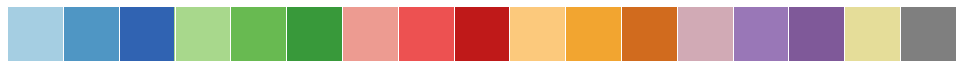

In [9]:
%%time
sns.palplot(job_colors)

assign sample employee and employee list variables for some functions

these are median samples...

In [10]:
%%time
# sample employee - halfway down the list from first month
first_month = p[p.mnum==0]
sample_emp = first_month.iloc[int(len(first_month) / 2)].empkey

CPU times: user 32 ms, sys: 12 ms, total: 44 ms
Wall time: 41.3 ms


In [11]:
%%time
# sample employee list - median of each employee group
sample_emp_list = []
g = p[p.mnum==0][['eg', 'empkey']].groupby('eg')
egs = pd.unique(p.eg)
for eg in egs:
    sample_emp_list.append(g.get_group(eg).iloc[int(len(g.get_group(eg)) * .5)].empkey)
g =[]

CPU times: user 8 ms, sys: 4 ms, total: 12 ms
Wall time: 12.7 ms


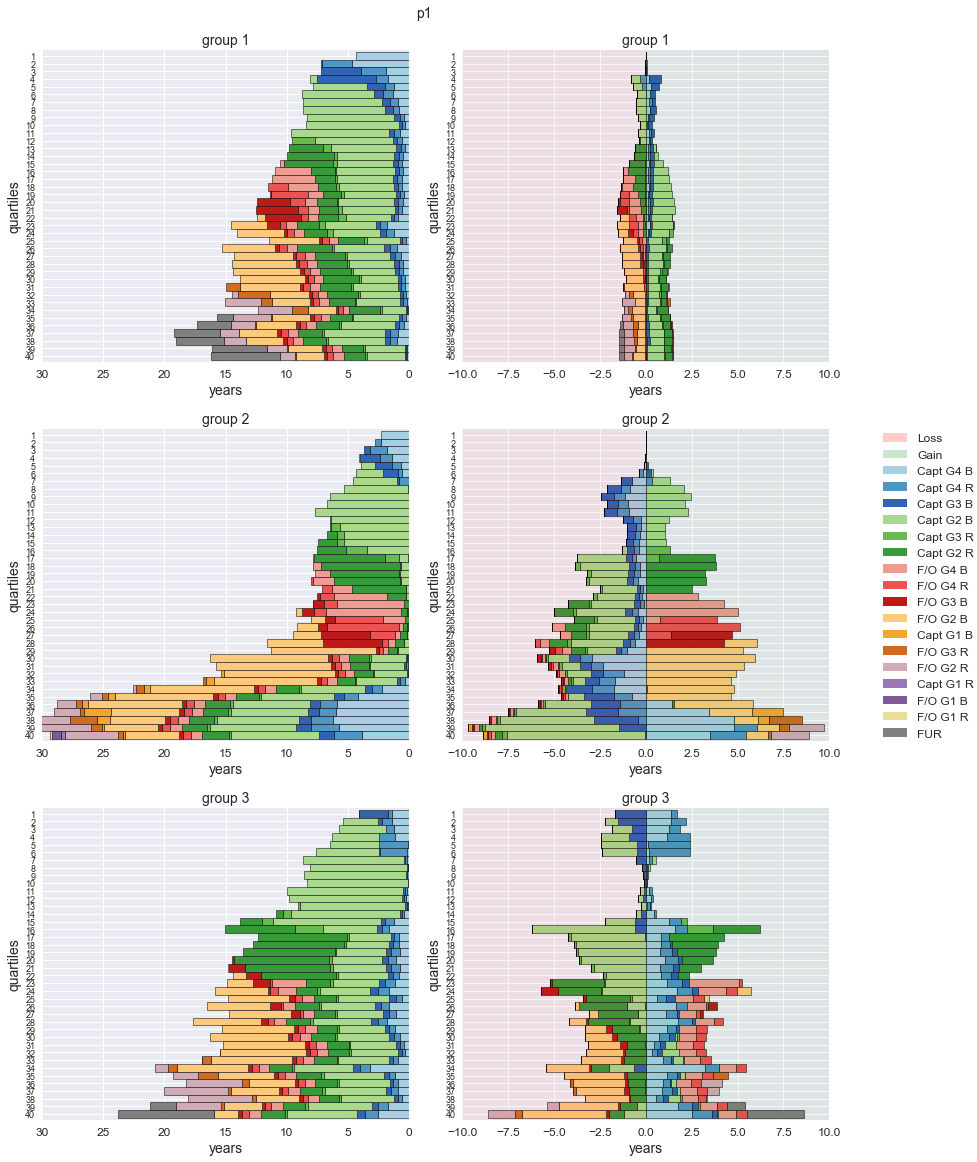

CPU times: user 8.43 s, sys: 56 ms, total: 8.49 s
Wall time: 8.49 s


In [12]:
%%time
# uncomment the two lines of arguments below for an example of attribute filtering
mp.quartile_years_in_position('p1', 'standalone', job_levels, 40,
                              job_strs, p_dict,
                              job_colors, ds_dict=ds_dict,
                              flip_x=True, flip_y=False,
                              xsize=12, ysize=16, plot_differential=True,
                              #attr1='ldate', oper1='<=', val1='1997-12-31',
                              #attr2='ldate', oper2='>=', val2='1986-12-31',
                              rotate=True, custom_color=False, cm_name='Set1',
                              normalize_yr_scale=True, gain_loss_bg=True)

age vs. list percentage for a specific month

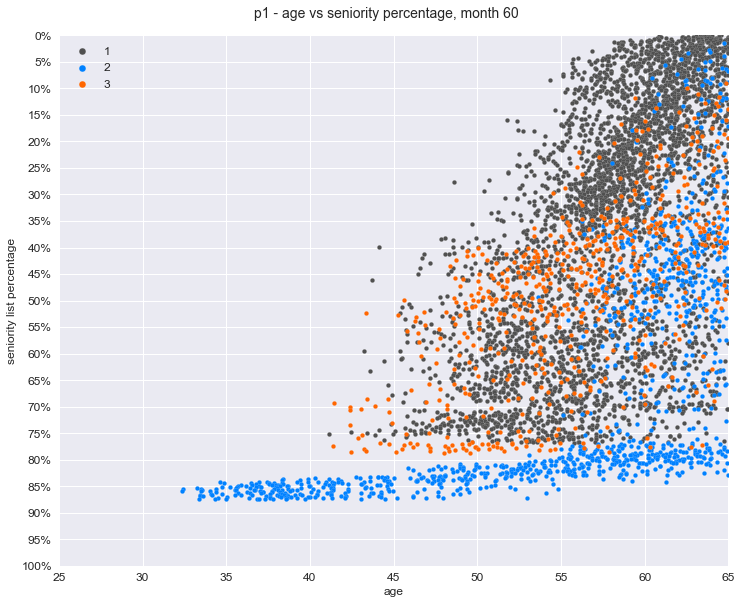

CPU times: user 364 ms, sys: 0 ns, total: 364 ms
Wall time: 364 ms


In [13]:
%%time
mnum = 60  # month number
mp.age_vs_spcnt('p1', [1,2,3], mnum, eg_colors,
                p_dict, ret_age,
                ds_dict=ds_dict,
                #attr1='ldate', oper1='<=', val1='1997-12-31',
                chart_example=False)

employees from each group holding a specific job level

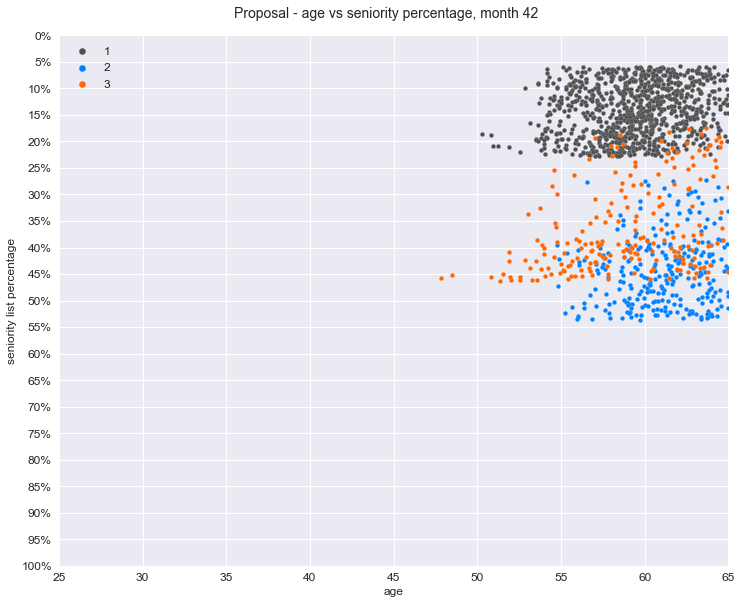

CPU times: user 324 ms, sys: 16 ms, total: 340 ms
Wall time: 341 ms


In [14]:
%%time
jnum = 4  # job number
job_p = p[p.jnum==jnum]
mp.age_vs_spcnt(job_p, [1,2,3], 42, eg_colors,
                p_dict, ret_age,
                ds_dict=ds_dict, chart_example=False)

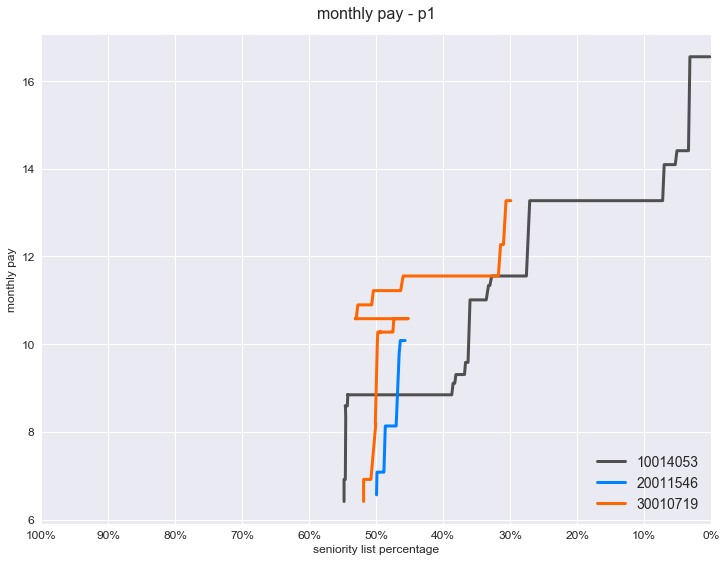

CPU times: user 364 ms, sys: 20 ms, total: 384 ms
Wall time: 385 ms


In [15]:
%%time
mp.multiline_plot_by_emp('p1', 'mpay', 'spcnt', sample_emp_list,
                         job_levels, ret_age,
                         eg_colors, job_strs,
                         adict, ds_dict=ds_dict, chart_example=False)

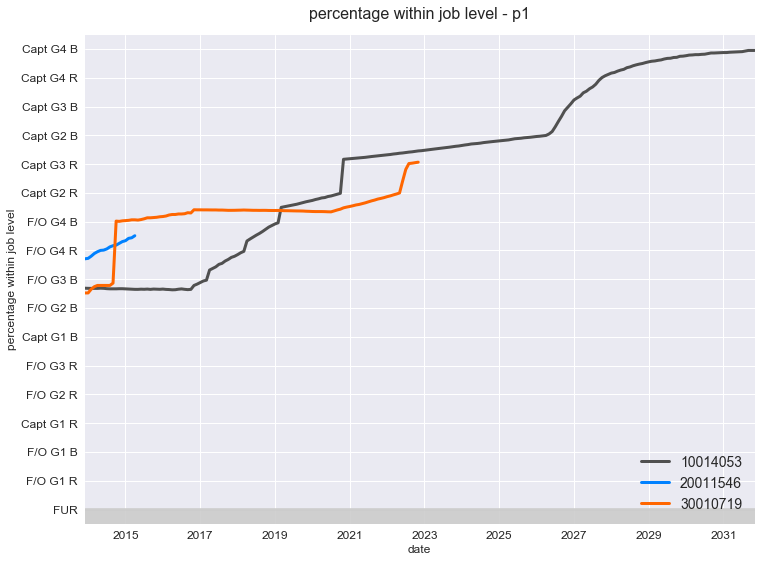

CPU times: user 376 ms, sys: 52 ms, total: 428 ms
Wall time: 424 ms


In [16]:
%%time
mp.multiline_plot_by_emp('p1', 'jobp', 'date', sample_emp_list,
                         job_levels, ret_age,
                         eg_colors, job_strs,
                         adict, ds_dict=ds_dict, chart_example=False)

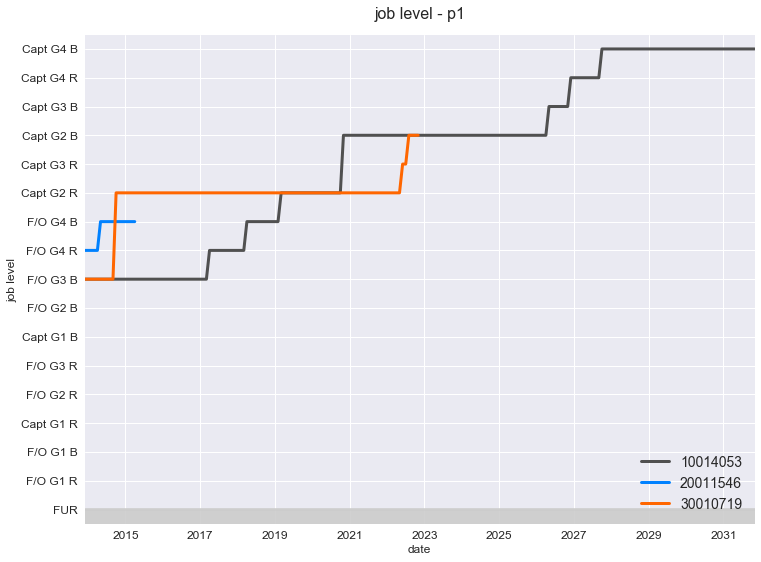

CPU times: user 900 ms, sys: 28 ms, total: 928 ms
Wall time: 927 ms


In [17]:
%%time
mp.multiline_plot_by_emp('p1', 'jnum', 'date', sample_emp_list,
                         job_levels, ret_age,
                         eg_colors, job_strs,
                         adict, ds_dict=ds_dict)

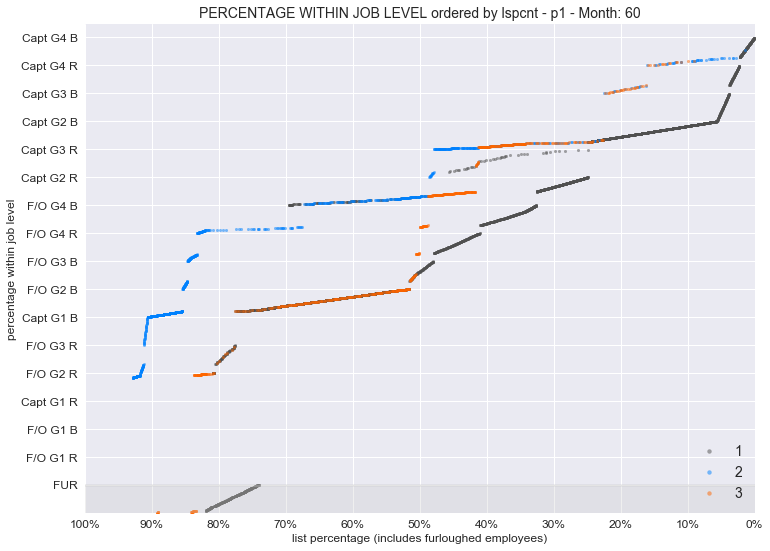

CPU times: user 312 ms, sys: 0 ns, total: 312 ms
Wall time: 311 ms


In [18]:
%%time
mp.multiline_plot_by_eg('p1', 'jobp', 'lspcnt', [1,2,3], job_strs,
                        job_levels, eg_colors,
                        ret_age, adict, ds_dict=ds_dict,
                        #attr1='ldate', oper1='>=', val1='1999-12-31',
                        mnum=60, scatter=True, scatter_size=7,
                        exclude_fur=False, full_pcnt_xscale=True, chart_example=False)

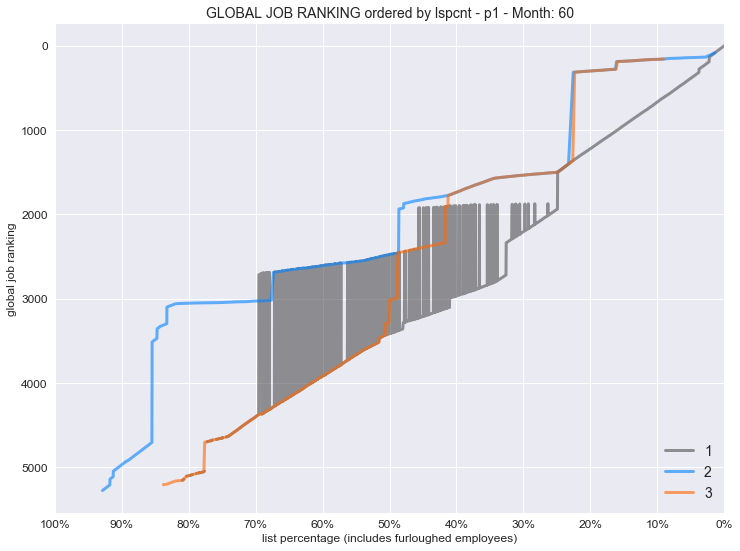

CPU times: user 288 ms, sys: 0 ns, total: 288 ms
Wall time: 286 ms


In [19]:
%%time
mp.multiline_plot_by_eg('p1', 'cat_order', 'lspcnt', [1,2,3],
                        job_strs, job_levels,
                        eg_colors, ret_age, adict,
                        ds_dict=ds_dict, mnum=60, scatter=False,
                        exclude_fur=False, full_pcnt_xscale=True)

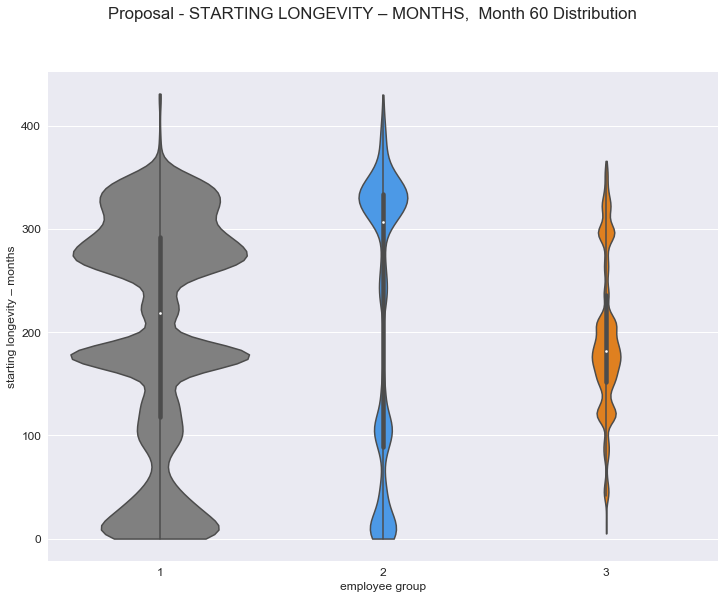

CPU times: user 232 ms, sys: 4 ms, total: 236 ms
Wall time: 239 ms


In [20]:
%%time
mp.violinplot_by_eg(p, 's_lmonths', ret_age,
                    adict, ds_dict=ds_dict,
                    mnum=60, scale='count', chart_example=False)

/home/bd/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


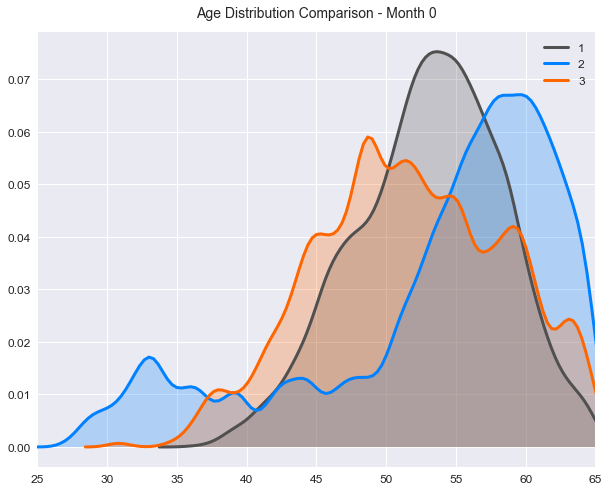

CPU times: user 240 ms, sys: 0 ns, total: 240 ms
Wall time: 239 ms


In [21]:
%%time
mp.age_kde_dist('p1', eg_colors,
                p_dict, ret_age,
                ds_dict=ds_dict, mnum=0, chart_example=False)

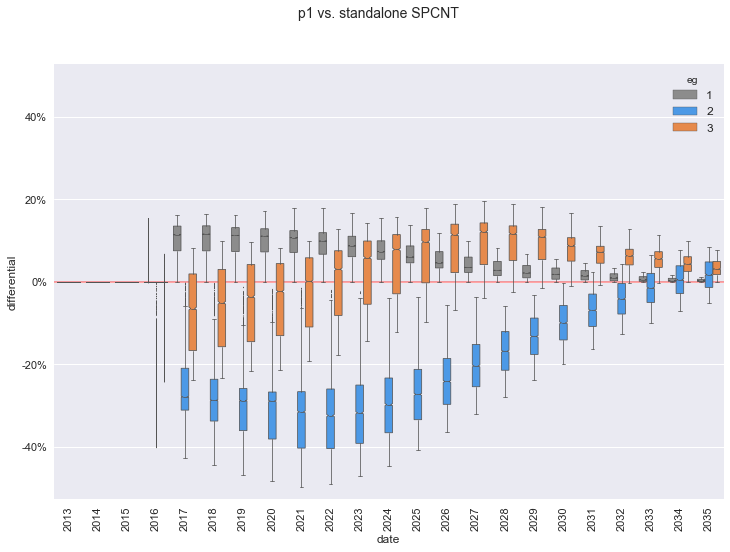

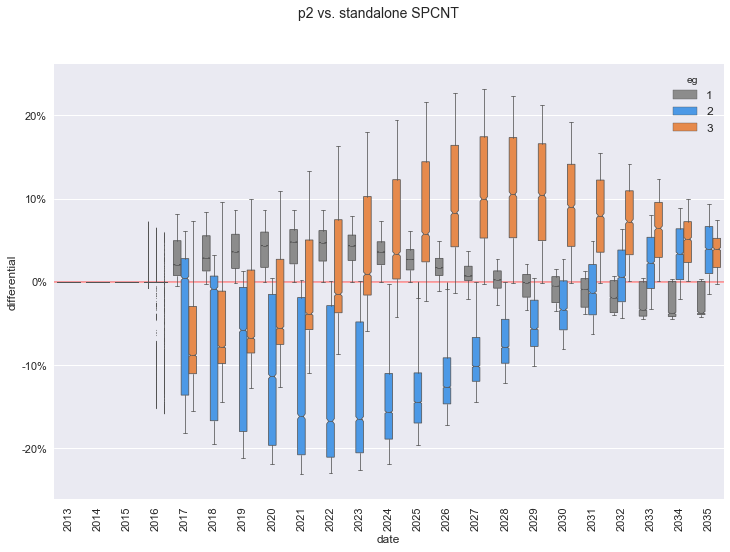

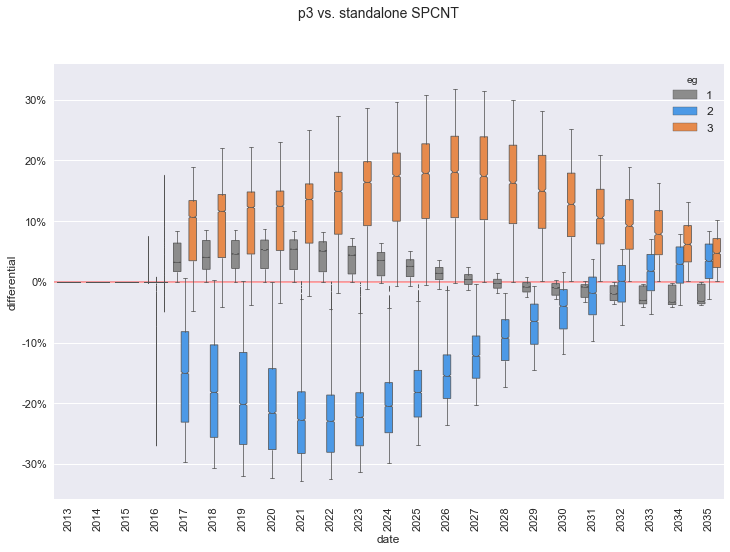

CPU times: user 11.5 s, sys: 252 ms, total: 11.8 s
Wall time: 11.7 s


In [22]:
%%time
mp.eg_diff_boxplot(['p1', 'p2', 'p3'], 'standalone', [2, 3, 1],
                   cdict['eg_colors_lgt'],
                   job_levels,
                   job_levels + 1,
                   adict, ds_dict=ds_dict,
                   #attr1='ldate', oper1='<=', val1='1986-12-31',
                   measure='spcnt', comparison='',
                   linewidth=.75,
                   year_clip=2035, chart_example=False, chart_style='darkgrid')

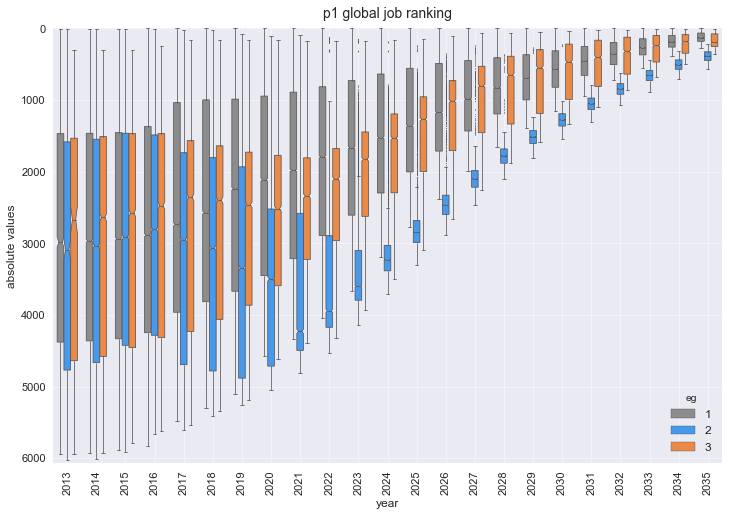

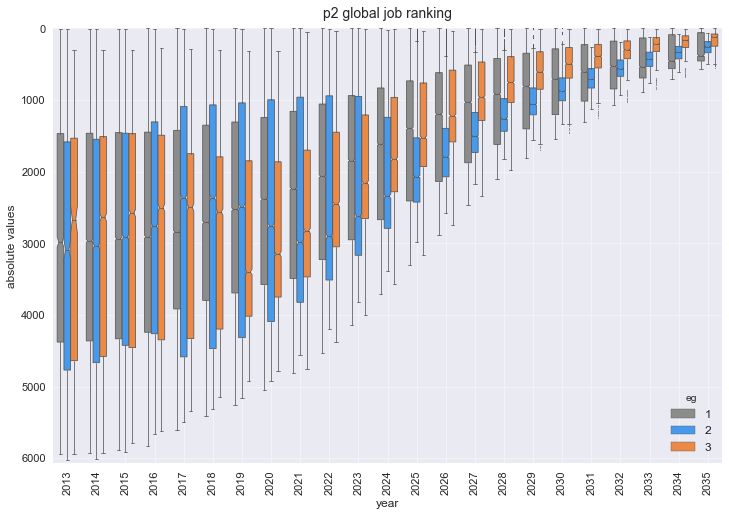

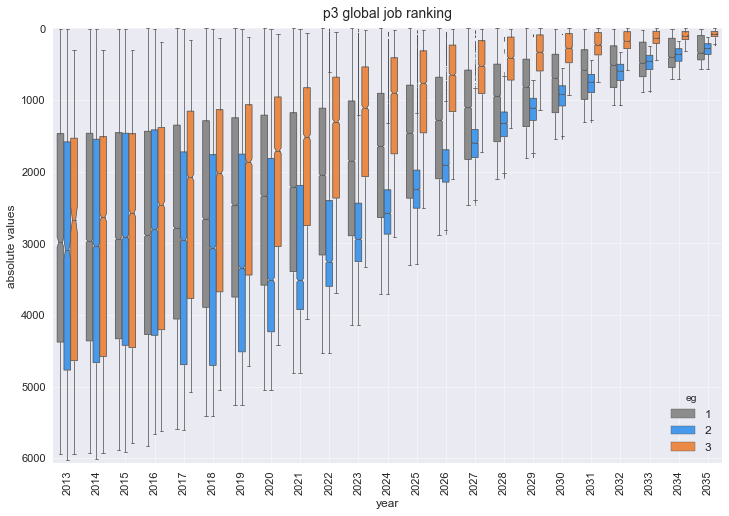

CPU times: user 6.71 s, sys: 72 ms, total: 6.78 s
Wall time: 6.74 s


In [23]:
%%time
mp.eg_boxplot(['p1', 'p2', 'p3'], [3,2,1], cdict['eg_colors_lgt'], job_levels + 1,
              adict,
              #attr1='doh', oper1='<=', val1='1987-12-31',
              show_whiskers=True, xsize=12, ysize=8,
              measure='cat_order', ds_dict=ds_dict, chart_style='darkgrid')

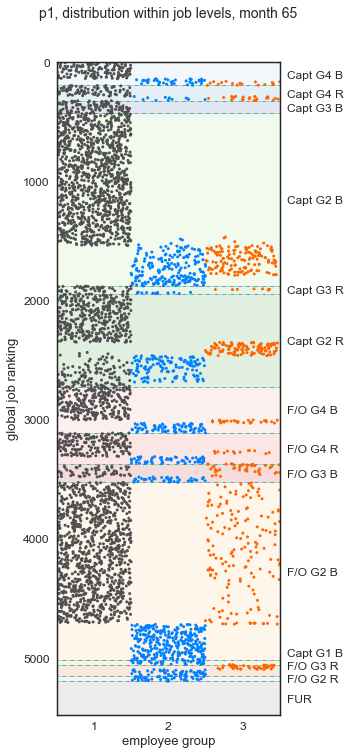

CPU times: user 376 ms, sys: 4 ms, total: 380 ms
Wall time: 376 ms


In [24]:
%%time
mp.stripplot_distribution_in_category('p1', 65, job_levels,
                                      sdict['stripplot_full_time_pcnt'],
                                      eg_colors,
                                      job_colors, sdict['job_strs_dict'],
                                      adict,
                                      p_dict, ds_dict=ds_dict, bg_alpha=.15,
                                      #attr1='ldate', oper1='<=', val1='1998-12-31',
                                      #fur_color=[0.5, 0.5, 0.5, .5],
                                      ysize=12, xsize=4,
                                      chart_example=False)

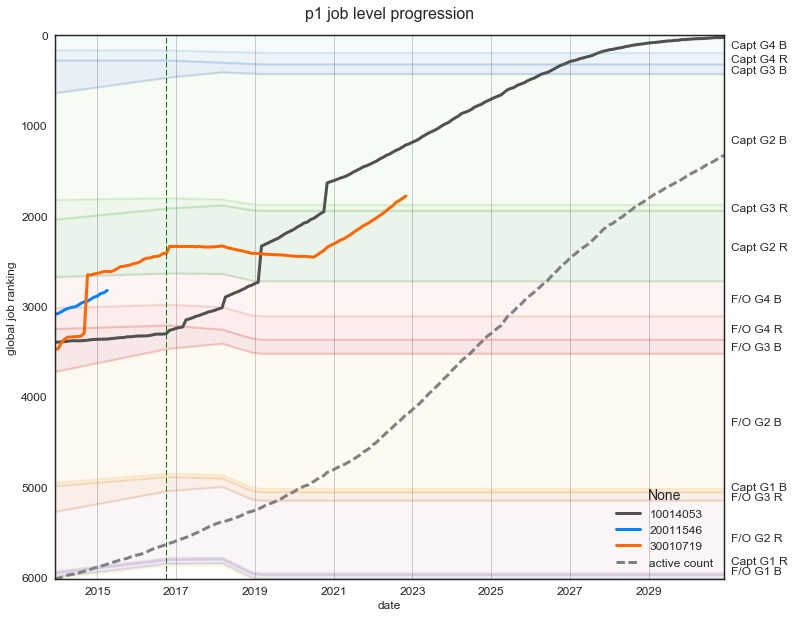

CPU times: user 832 ms, sys: 4 ms, total: 836 ms
Wall time: 834 ms


In [25]:
%%time
mp.job_level_progression('p1', sample_emp_list, '2030-12-31',
                         sdict, cdict,
                         eg_colors, job_colors,
                         ds_dict=ds_dict, alpha=.1,
                         chart_example=False)

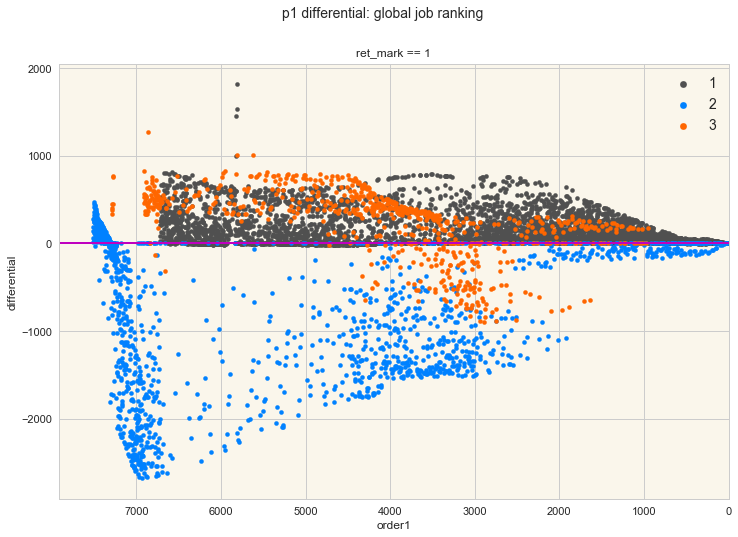

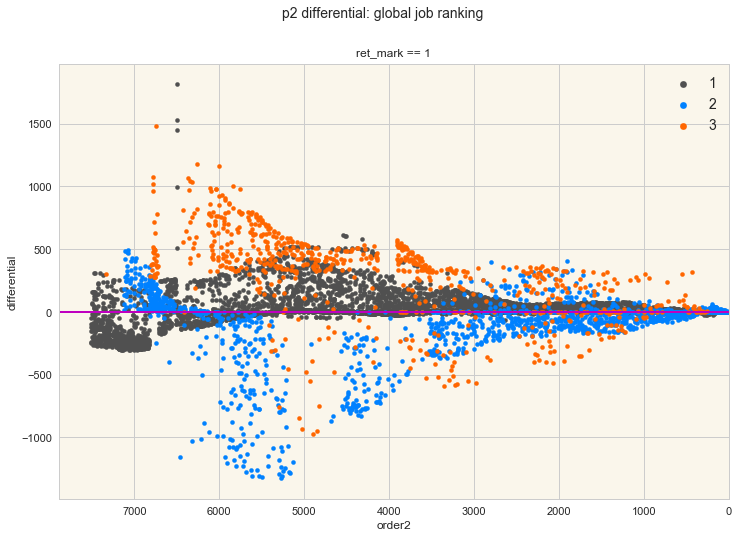

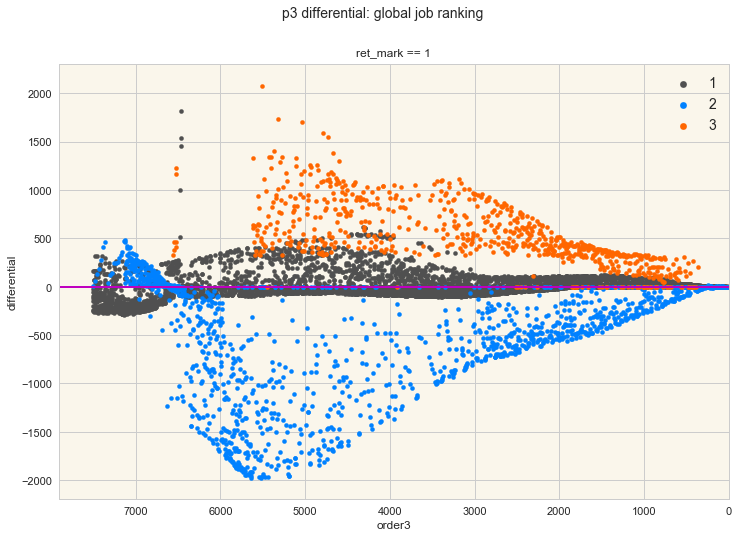

CPU times: user 1.19 s, sys: 4 ms, total: 1.19 s
Wall time: 1.19 s


In [26]:
%%time
mp.differential_scatter(['p1', 'p2', 'p3'], 'standalone', 'cat_order',
                        [1, 2, 3], adict, cdict, p_dict, ds_dict=ds_dict, prop_order=True,
                        attr1='ret_mark', oper1='==', val1=1,
                        show_scatter=True, show_lin_reg=False,
                        show_mean=False, mean_len=80,
                        dot_size=20, lin_reg_order=12,
                        ylimit=False, ylim=5,
                        bright_bg=True,
                        chart_style='whitegrid', chart_example=False)

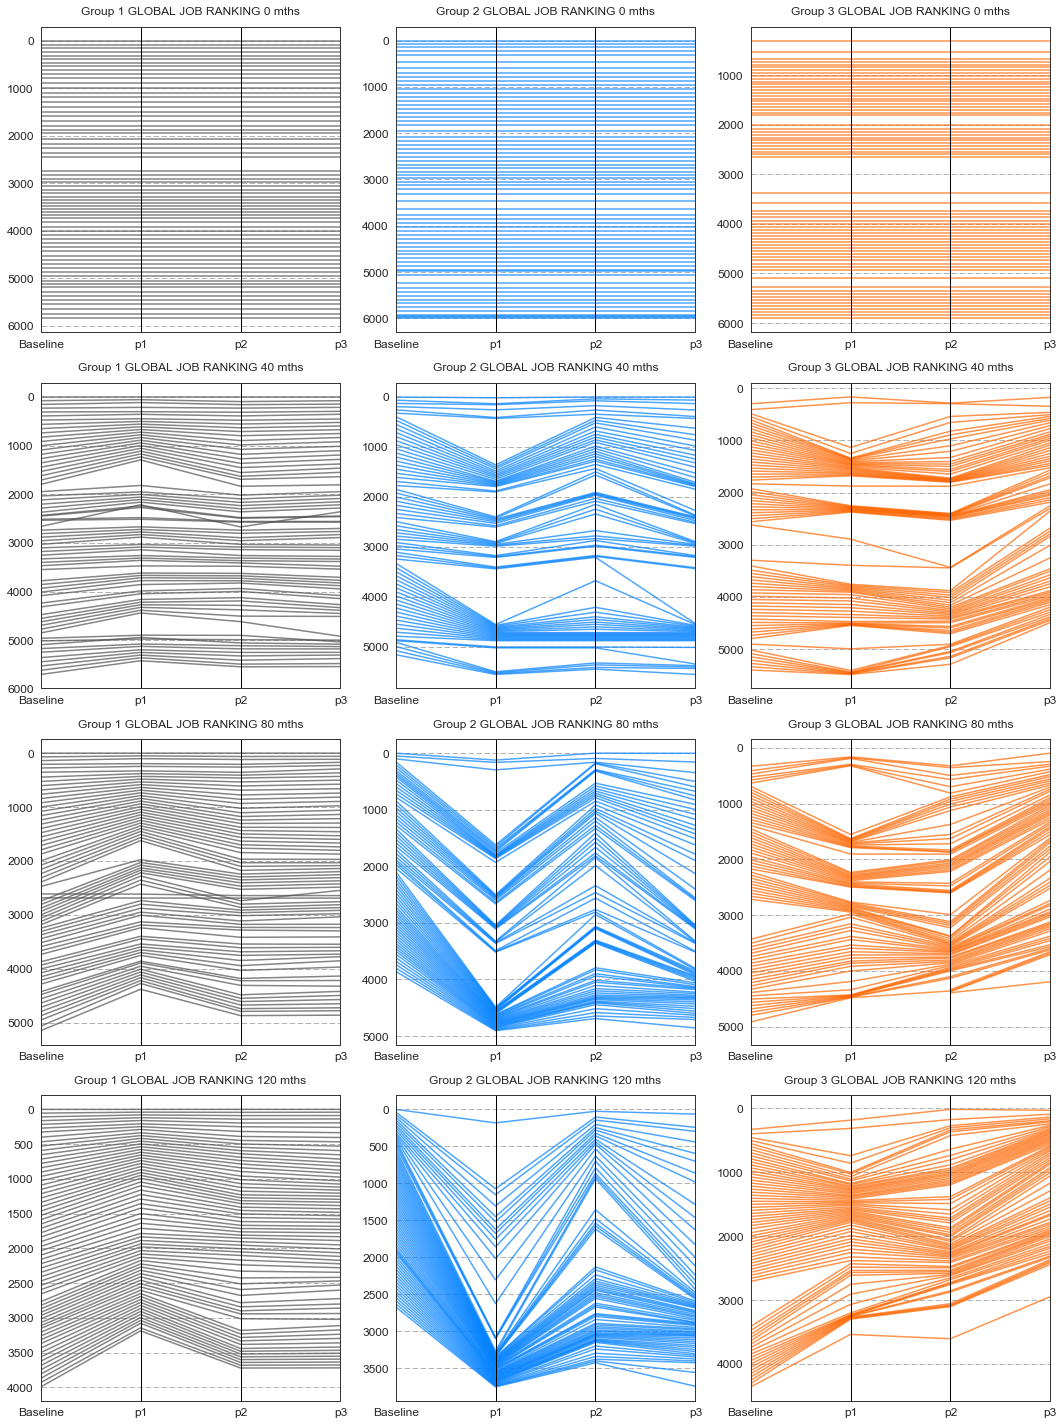

CPU times: user 4.47 s, sys: 8 ms, total: 4.48 s
Wall time: 4.48 s


In [27]:
%%time
mp.parallel(['p1', 'p2', 'p3'], 'standalone', [1, 2, 3],
            'cat_order', [0, 40, 80, 120],
            job_levels,
            eg_colors, sdict, adict,
            ds_dict=ds_dict,
            #attr1='ldate', oper1='<=', val1='1997-12-31',
            left=0, xsize=5, ysize=5)

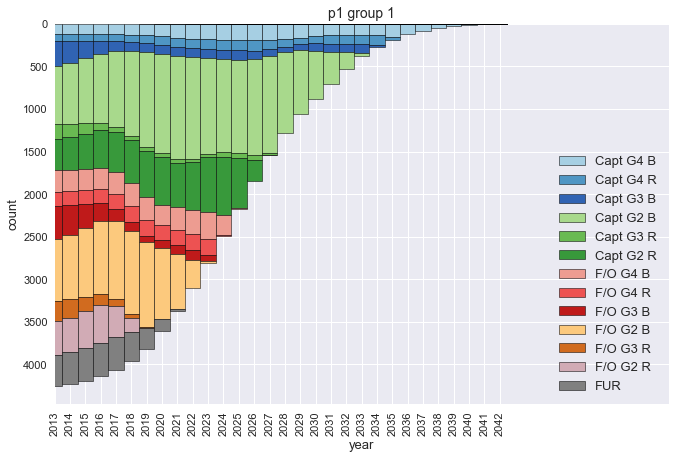

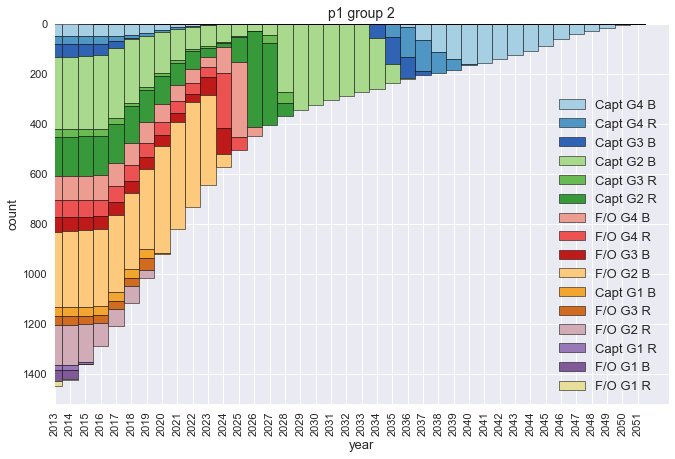

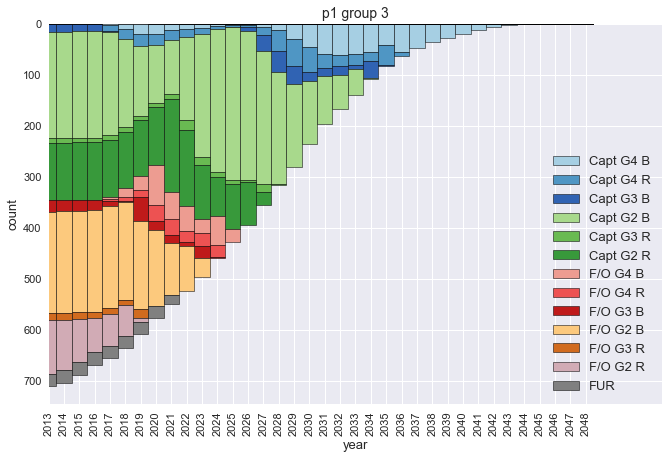

CPU times: user 4 s, sys: 28 ms, total: 4.03 s
Wall time: 4.03 s


In [28]:
%%time
mp.job_grouping_over_time('p1', [1,2,3], job_strs,
                          job_colors, p_dict,
                          rets_only=False, ds_dict=ds_dict,
                          #attr1='ldate', oper1='<=', val1='1997-12-31',
                          time_group='A', plt_kind='bar',
                          display_yrs=40, legend_loc=4, xsize=11,
                          ysize=7, chart_example=False)

integrated distribution of all jobs, all employee groups

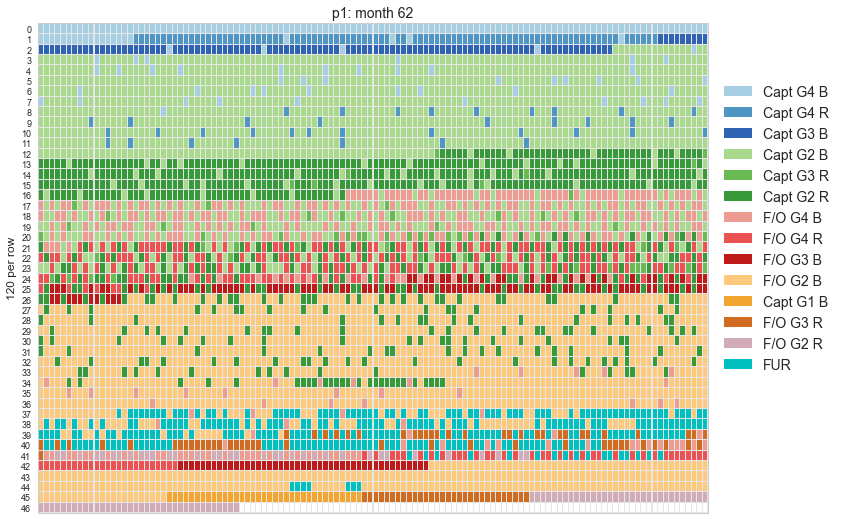

CPU times: user 788 ms, sys: 4 ms, total: 792 ms
Wall time: 791 ms


In [29]:
%%time
mp.rows_of_color('p1', 62, ['jnum'], eg_colors,
                 job_colors, sdict, ds_dict=ds_dict,
                 cols=120, job_only=False, jnum=4,
                 cell_border=True, eg_border_color='.9', eg_list=[1,2,3],
                 job_border_color='.75', xsize=12, ysize=9, fur_color='c',
                 chart_example=False)

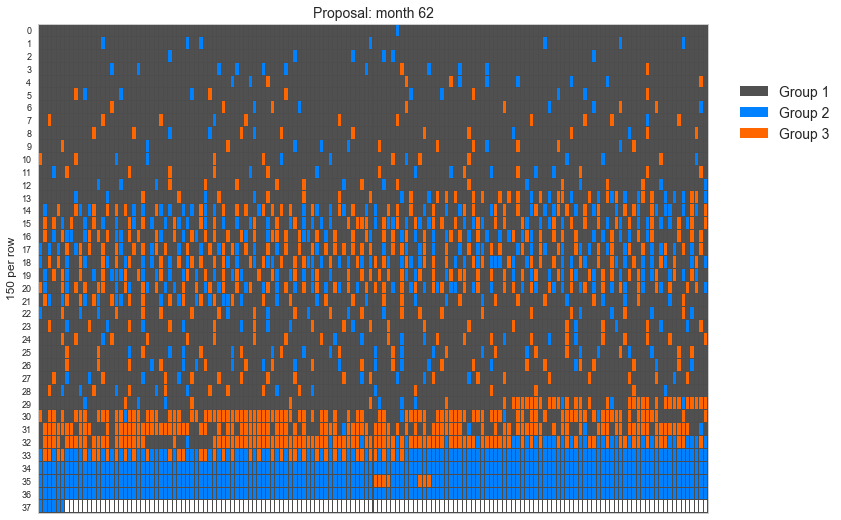

CPU times: user 976 ms, sys: 12 ms, total: 988 ms
Wall time: 989 ms


In [30]:
%%time
mp.rows_of_color('p1', 62, ['eg', 'fur'], eg_colors,
                 job_colors, sdict, ds_dict=ds_dict,
                 cols=150, job_only=False, jnum=6,
                 cell_border=True, eg_border_color='.3',
                 job_border_color='.55', xsize=12, ysize=9,
                 chart_example=True)

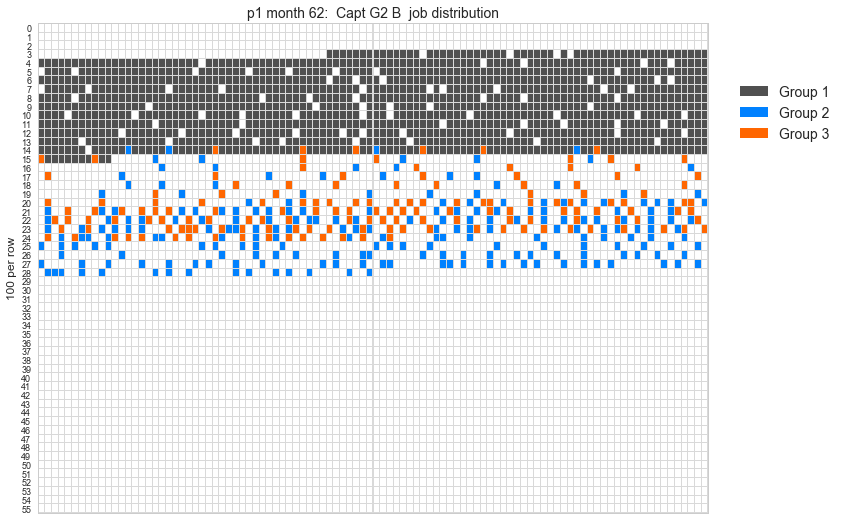

CPU times: user 736 ms, sys: 4 ms, total: 740 ms
Wall time: 742 ms


In [31]:
%%time
mp.rows_of_color('p1', 62, ['eg'], eg_colors,
                 job_colors, sdict, ds_dict=ds_dict,
                 cols=100, job_only=True, jnum=4,
                 #attr1='age', oper1='>=', val1='60',
                 cell_border=True, eg_border_color='.6',
                 job_border_color='.85', xsize=12, ysize=9, chart_example=False)

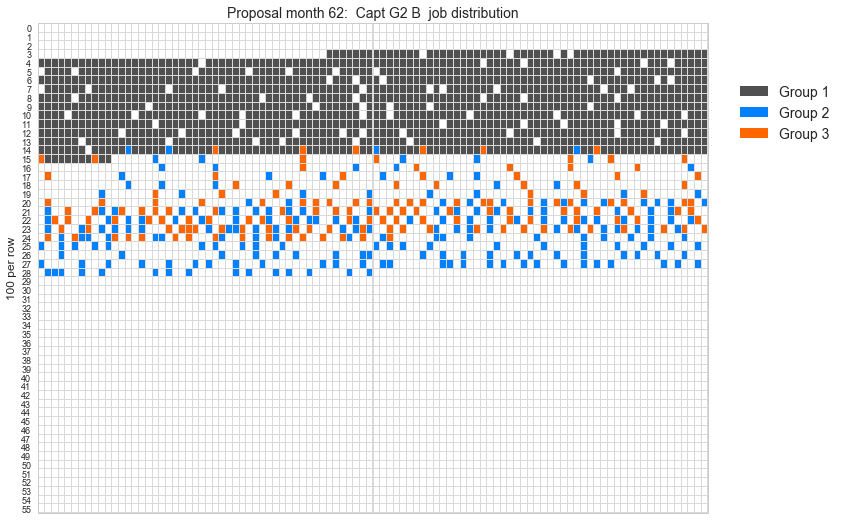

CPU times: user 824 ms, sys: 12 ms, total: 836 ms
Wall time: 836 ms


In [32]:
%%time
mp.rows_of_color('p1', 62, ['eg', 'fur'], eg_colors,
                 job_colors, sdict, ds_dict=ds_dict,
                 cols=100, job_only=True, jnum=4,
                 #attr1='ldate', oper1='<=', val1='1987-12-31',
                 cell_border=True, eg_border_color='.3',
                 job_border_color='.85', xsize=12, ysize=9,
                 chart_example=True)

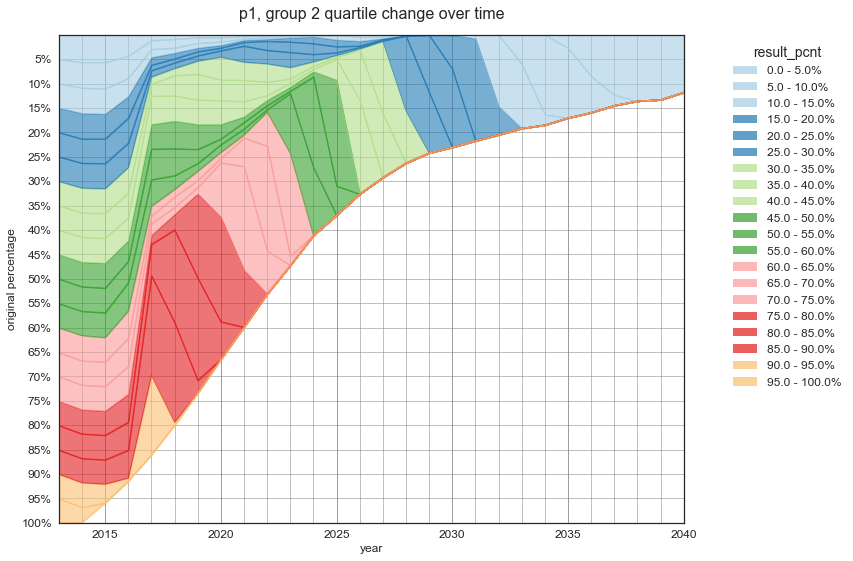

CPU times: user 804 ms, sys: 8 ms, total: 812 ms
Wall time: 814 ms


In [33]:
%%time
mp.quartile_bands_over_time('p1', 2, 'spcnt', cdict['Dark2'], bins=20, ds_dict=ds_dict,
                            clip=True, year_clip=2040, kind='area',
                            quartile_ticks=False,
                            cm_name='Paired', quartile_alpha=.6,
                            grid_alpha=.5, custom_start=0,
                            custom_finish=.55, xsize=10, ysize=8,
                            alt_bg_color=False, bg_color='#faf6eb')

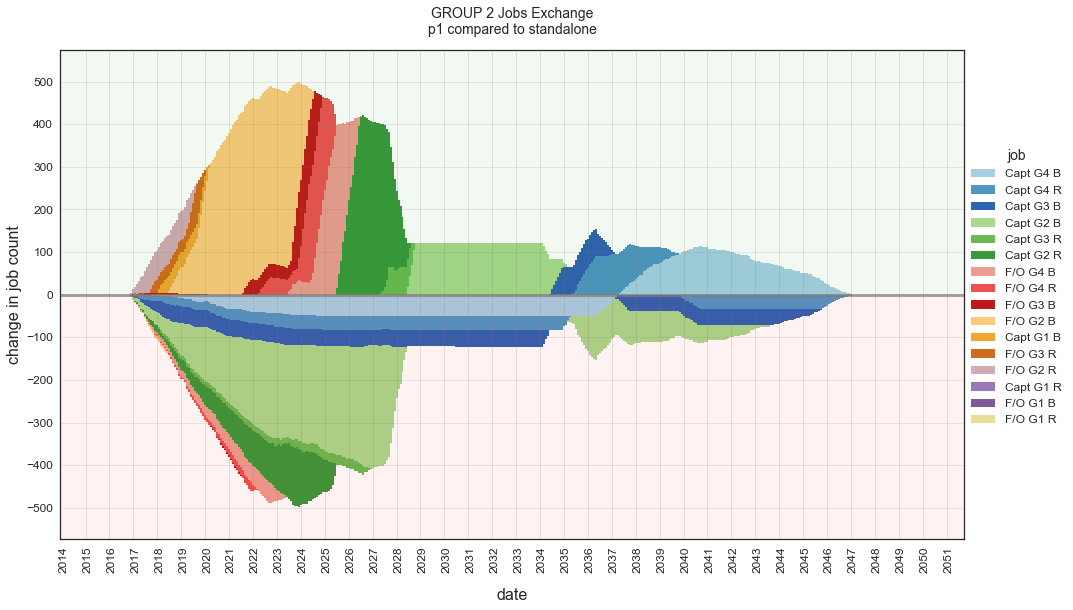

CPU times: user 37 s, sys: 64 ms, total: 37.1 s
Wall time: 37.1 s


In [34]:
%%time
mp.job_transfer('p1', 'standalone', 2,
                job_colors, job_levels,
                starting_date, job_strs, p_dict,
                ds_dict=ds_dict,
                custom_color=False, gb_period='M')

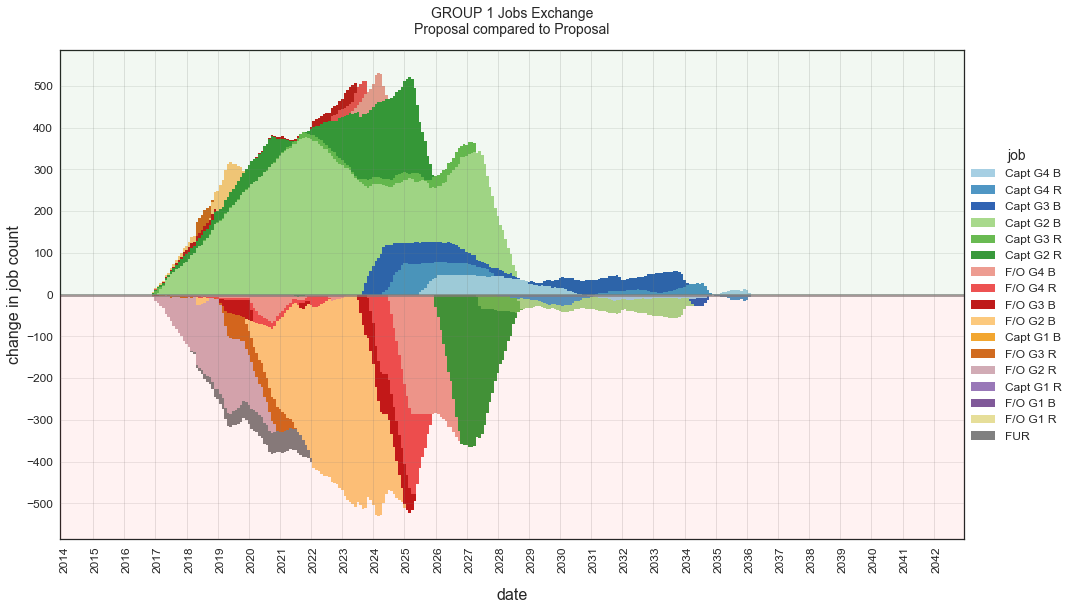

CPU times: user 27.6 s, sys: 40 ms, total: 27.7 s
Wall time: 27.7 s


In [35]:
%%time
d1 = ds_dict['p1'][0]
d2 = ds_dict['standalone'][0]
attr = 'doh'
value = '1989-12-31'
mp.job_transfer(d1[d1[attr] >= value], d2[d2[attr] >= value],
                1, job_colors, job_levels,
                starting_date, job_strs, p_dict, ysize=9,
                ds_dict=ds_dict,
                custom_color=False, gb_period='M')

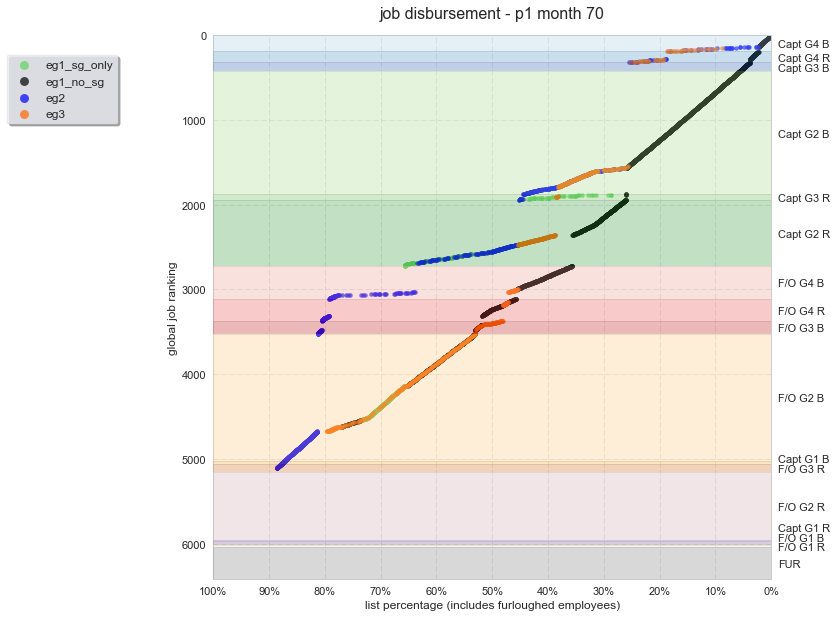

CPU times: user 508 ms, sys: 4 ms, total: 512 ms
Wall time: 509 ms


In [36]:
%%time
mp.eg_multiplot_with_cat_order('p1', 70, 'cat_order', 'lspcnt',
                               job_strs, job_colors,
                               job_levels, sdict, adict, ds_dict=ds_dict,
                               num=3, job_bands_alpha=.3,
                               single_eg=False, tick_fontsize=11)

In [37]:
mp.make_color_list()

[(0.89411764705882357, 0.10196078431372549, 0.10980392156862745, 1.0),
 (0.21568627450980393, 0.49411764705882355, 0.72156862745098038, 1.0),
 (0.30196078431372547, 0.68627450980392157, 0.29019607843137257, 1.0),
 (0.59607843137254901, 0.30588235294117649, 0.63921568627450975, 1.0),
 (1.0, 0.49803921568627452, 0.0, 1.0),
 (1.0, 1.0, 0.20000000000000001, 1.0),
 (0.65098039215686276, 0.33725490196078434, 0.15686274509803921, 1.0),
 (0.65098039215686276, 0.33725490196078434, 0.15686274509803921, 1.0),
 (0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 1.0),
 (0.59999999999999998, 0.59999999999999998, 0.59999999999999998, 1.0)]

In [38]:
mp.make_color_list(num_of_colors=4, cm_name_list=['Dark2'])

[(0.10588235294117647, 0.61960784313725492, 0.46666666666666667, 1.0),
 (0.45882352941176469, 0.4392156862745098, 0.70196078431372544, 1.0),
 (0.90196078431372551, 0.6705882352941176, 0.0078431372549019607, 1.0),
 (0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 1.0)]

NOTE:  Each chart represents a single employee group.
          The lines represent how that group is affected
          by each proposal.  This format is different from other
          charts.


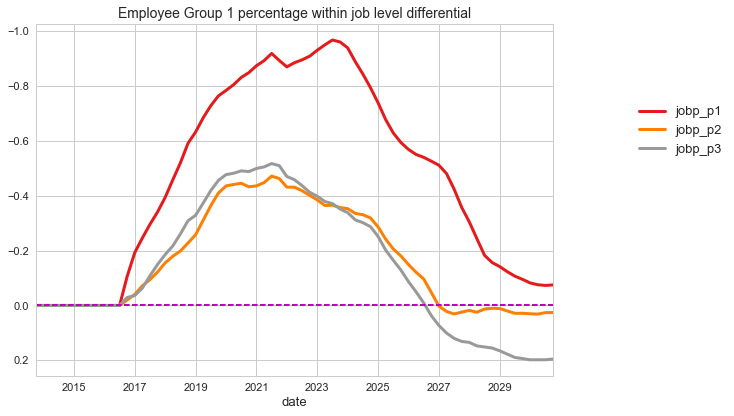

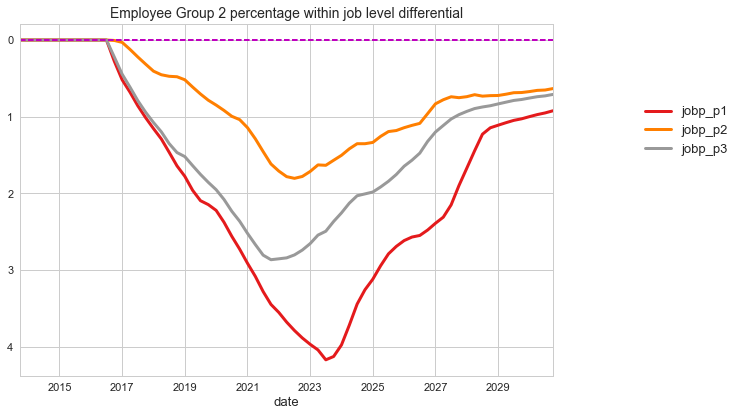

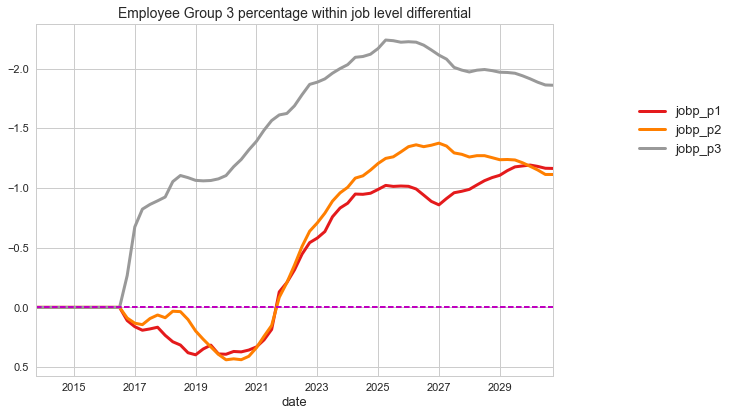

CPU times: user 2.06 s, sys: 28 ms, total: 2.08 s
Wall time: 2.06 s


In [39]:
%%time
mp.diff_range(['p1', 'p2', 'p3'], 'standalone', 'jobp', [1, 2, 3],
              adict, ds_dict=ds_dict, cm_name='Set1',
              #attr1='ldate', oper1='<=', val1='1991-12-31',
              #attr2='ldate', oper2='>=', val2='1985-12-31',
              show_range=False, show_mean=True,
              year_clip=2030)

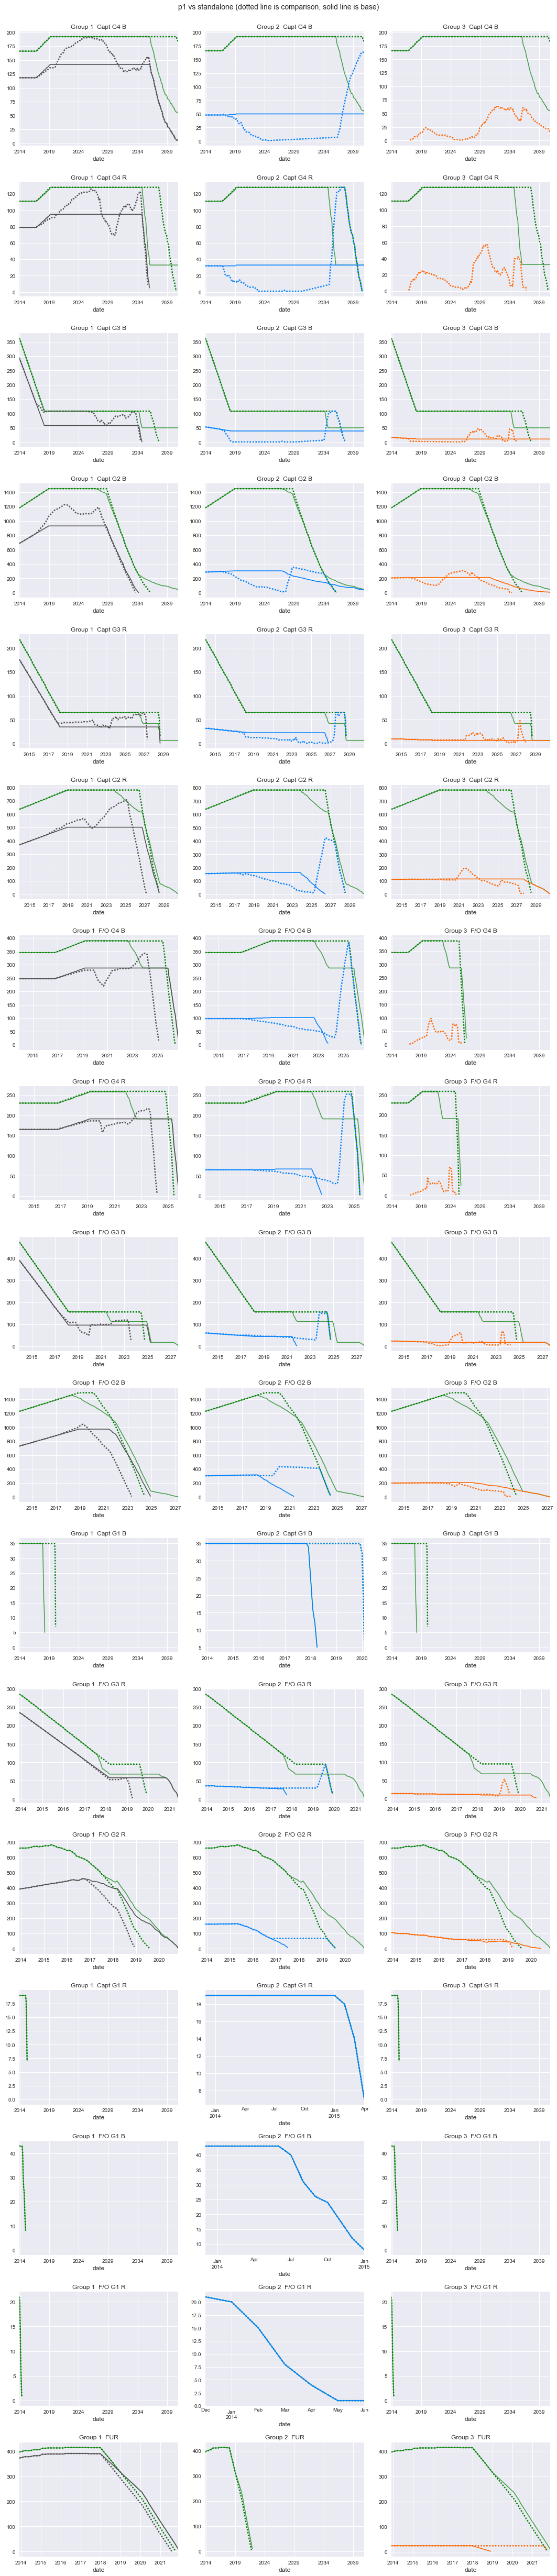

CPU times: user 11.1 s, sys: 24 ms, total: 11.2 s
Wall time: 11.2 s


In [40]:
%%time
mp.job_count_charts('p1', 'standalone', sdict, eg_colors,
                    eg_list=[1, 2, 3], ds_dict=ds_dict,
                    #attr1='lname', oper1='<=', val1='jones',
                    plot_egs_sep=True, plot_total=True, year_max=2040)

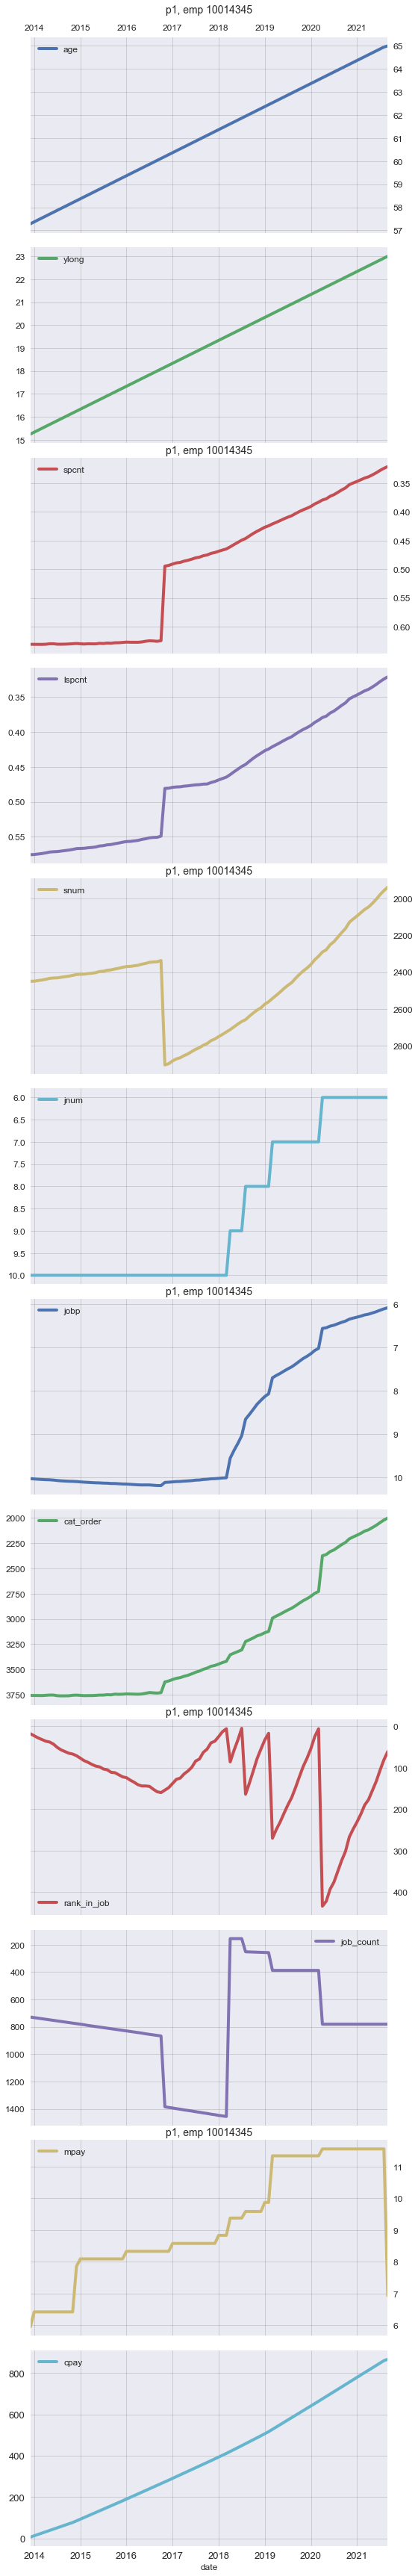

CPU times: user 2.69 s, sys: 8 ms, total: 2.7 s
Wall time: 2.7 s


In [41]:
%%time
mp.emp_quick_glance(sample_emp, 'p1', ds_dict=ds_dict)

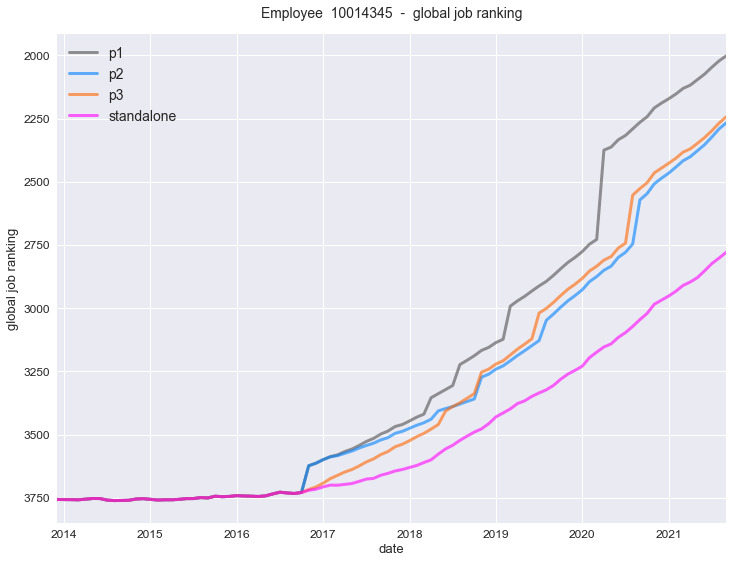

CPU times: user 328 ms, sys: 4 ms, total: 332 ms
Wall time: 332 ms


In [42]:
%%time
mp.single_emp_compare(sample_emp, 'cat_order',
                      ['p1', 'p2', 'p3', 'standalone'],
                      'date', job_strs, eg_colors,
                      p_dict, job_levels, adict,
                      ds_dict=ds_dict, chart_example=False)

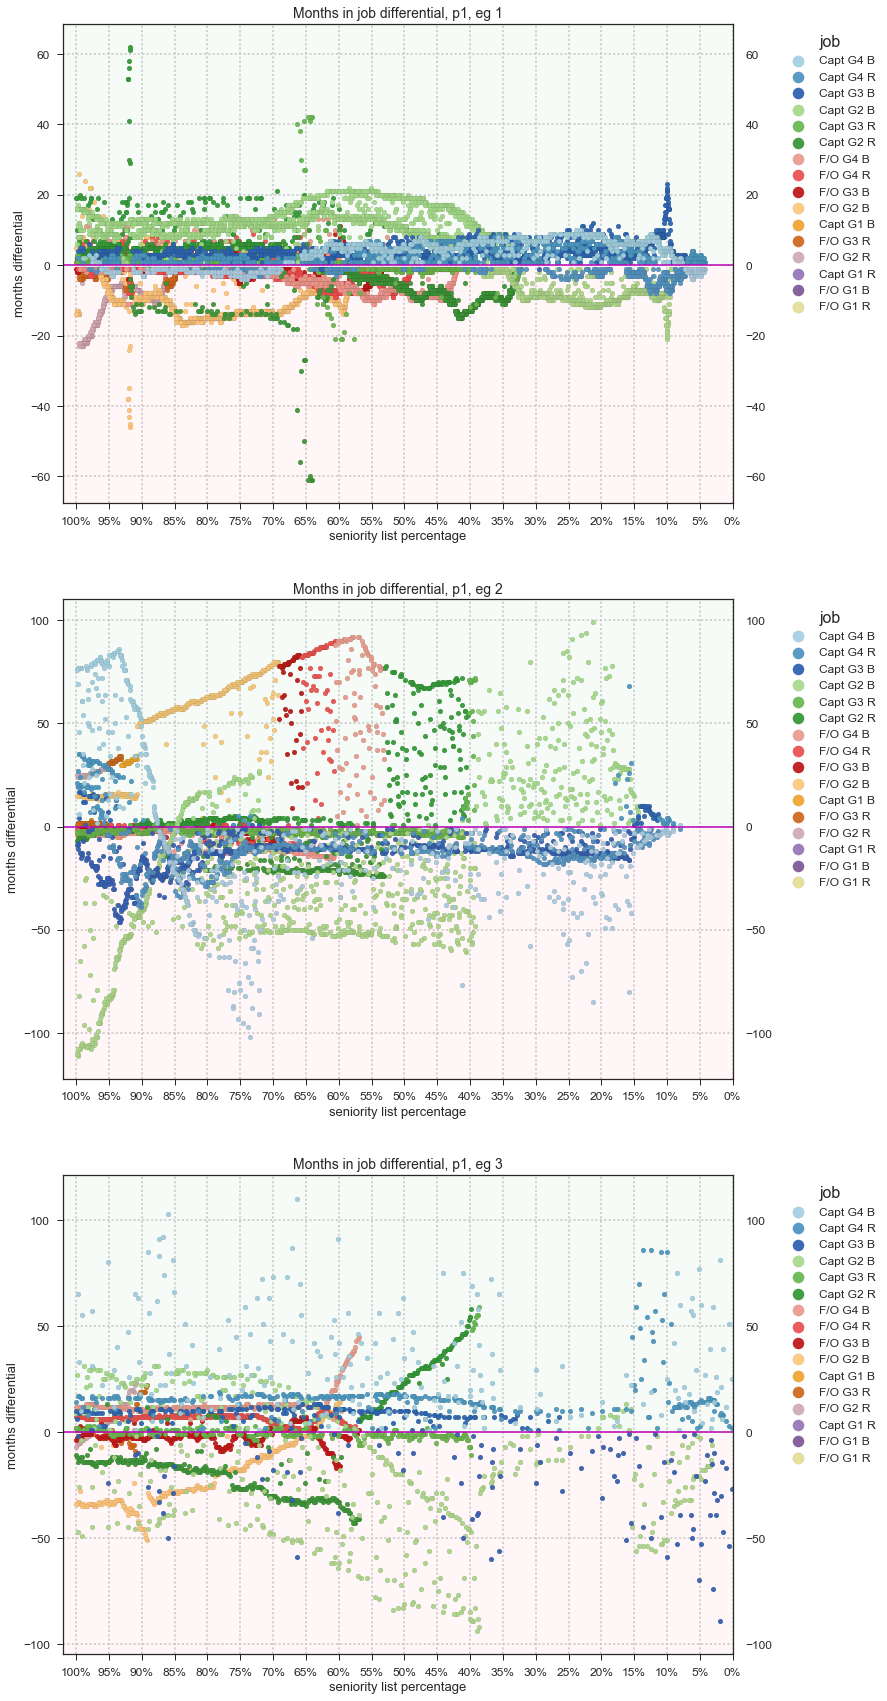

CPU times: user 2.76 s, sys: 28 ms, total: 2.78 s
Wall time: 2.79 s


In [43]:
%%time
mp.job_time_change(['p1'], 'standalone', [1, 2, 3], job_colors,
                   sdict['job_strs_dict'], job_levels, adict,
                   'spcnt', ds_dict=ds_dict, chart_style='ticks',
                   #attr1='ldate', oper1='<=', val1='1987-12-31',
                   bg_color='#ffffff')

### slicing and groupby month

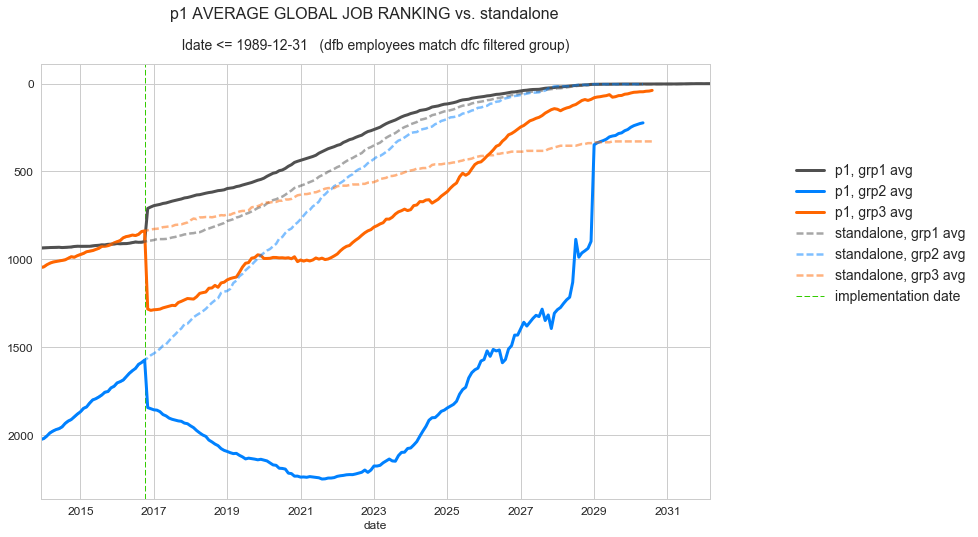

CPU times: user 1.05 s, sys: 0 ns, total: 1.05 s
Wall time: 1.05 s


In [44]:
%%time
mp.group_average_and_median('p1', 'standalone', [1, 2, 3],
                            eg_colors, 'cat_order', job_levels,
                            sdict, adict,
                            attr1='ldate', oper1='<=', val1='1989-12-31',
                            ds_dict=ds_dict, job_labels=False)

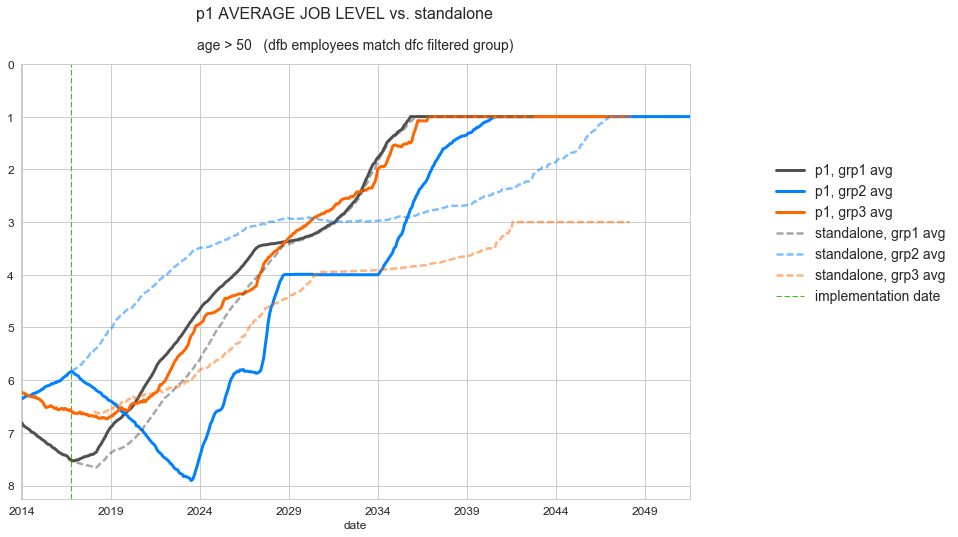

CPU times: user 2.59 s, sys: 64 ms, total: 2.65 s
Wall time: 2.65 s


In [45]:
%%time
mp.group_average_and_median('p1', 'standalone', [1, 2, 3],
                            eg_colors, 'jnum', job_levels,
                            sdict, adict,
                            ds_dict=ds_dict,
                            attr1='age', oper1='>', val1='50',
                            job_labels=False)

In [46]:
%%time
# filter entire dataset to include only those employees who were 50 or older during month 0
job_slice = mp.slice_ds_by_filtered_index('p1', ds_dict=ds_dict, mnum=0, attr='age', attr_oper='>=', attr_val=50)

CPU times: user 132 ms, sys: 0 ns, total: 132 ms
Wall time: 130 ms


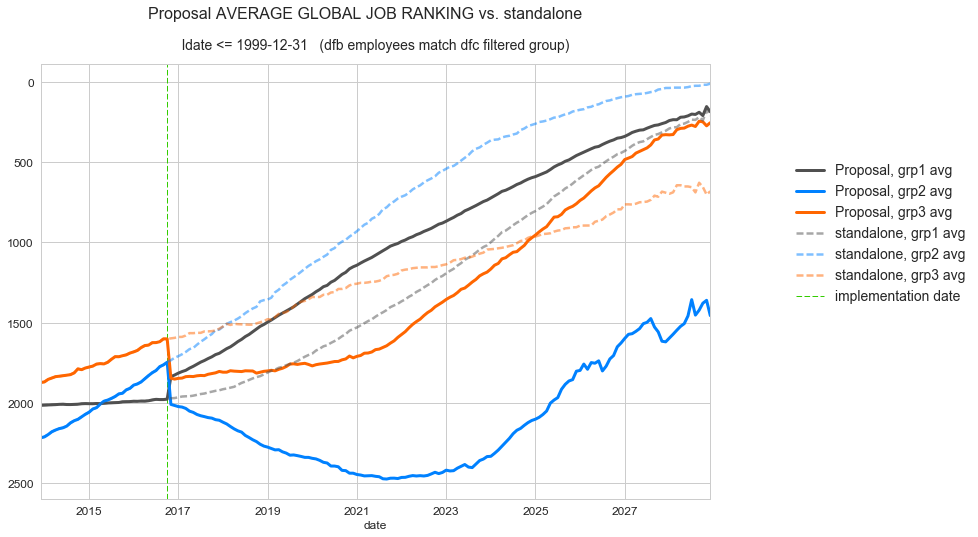

CPU times: user 1.6 s, sys: 40 ms, total: 1.64 s
Wall time: 1.64 s


In [47]:
%%time
# use the filtered dataset from the cell above as input (job_slice).
# this chart shows average job category order number for employees who were at least 50 at month 0 and
# who have a longevity date in 1999 or earlier...
mp.group_average_and_median(job_slice, 'standalone', [1, 2, 3],
                            eg_colors, 'cat_order', job_levels,
                            sdict, adict,
                            attr1='ldate', oper1='<=', val1='1999-12-31',
                            ds_dict=ds_dict, job_labels=False)

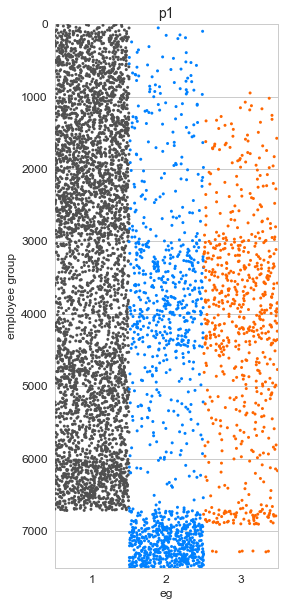

CPU times: user 244 ms, sys: 0 ns, total: 244 ms
Wall time: 244 ms


In [48]:
%%time
mp.stripplot_eg_density('p1', 40, eg_colors, adict,
                        #attr1='age', oper1='>=', val1='62',
                        ds_dict=ds_dict, xsize=4)

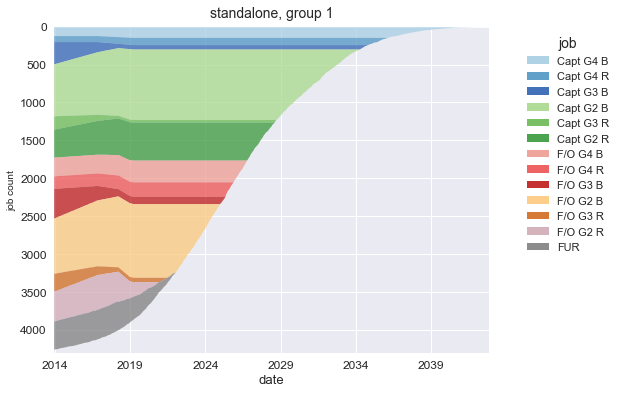

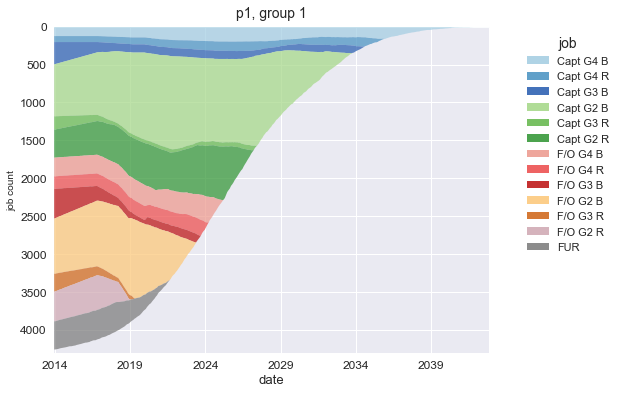

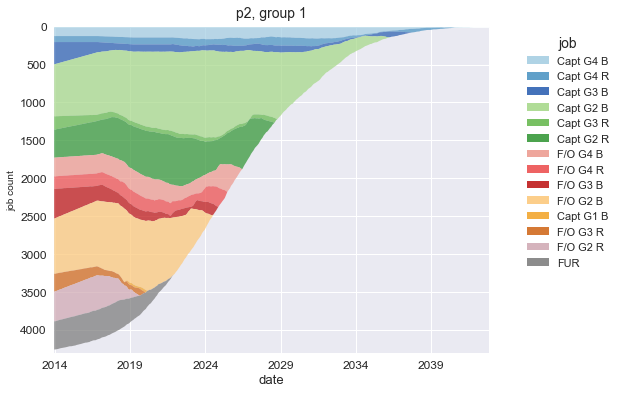

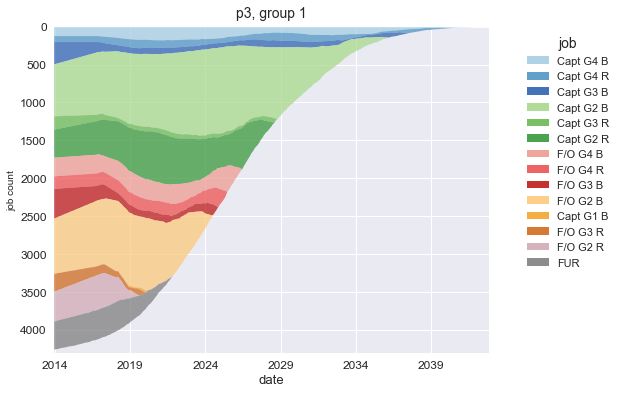

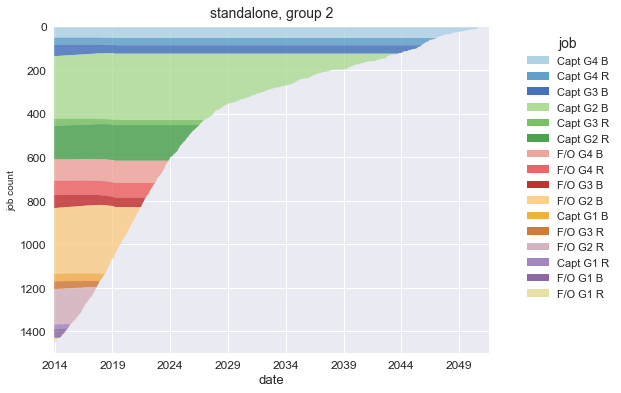

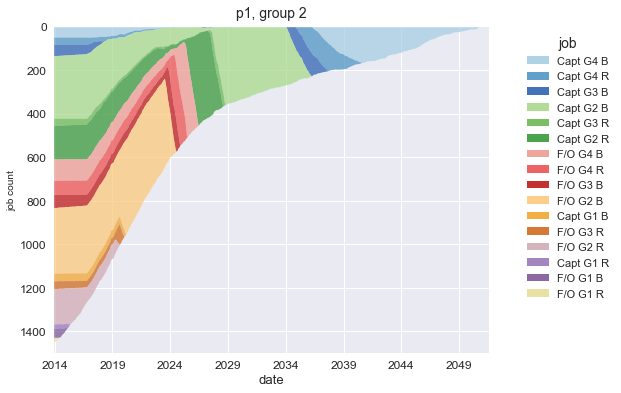

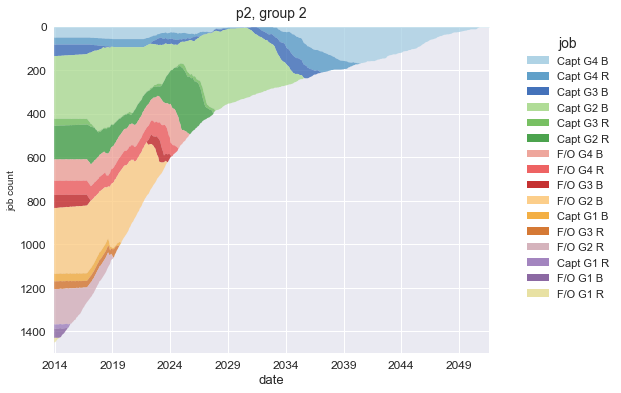

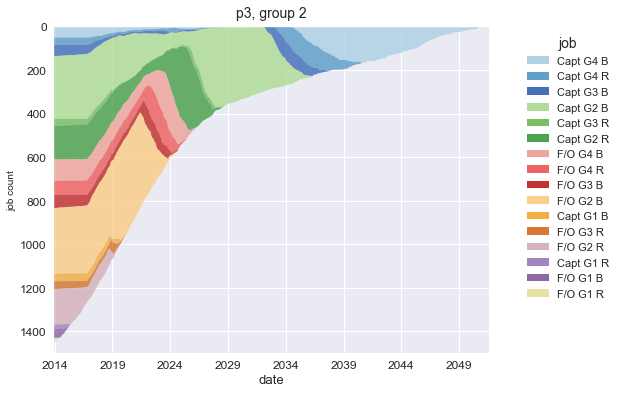

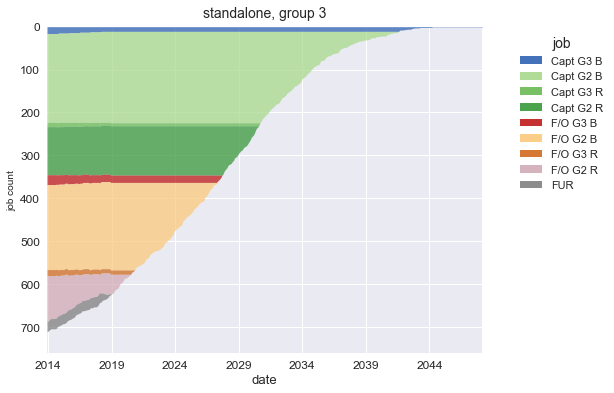

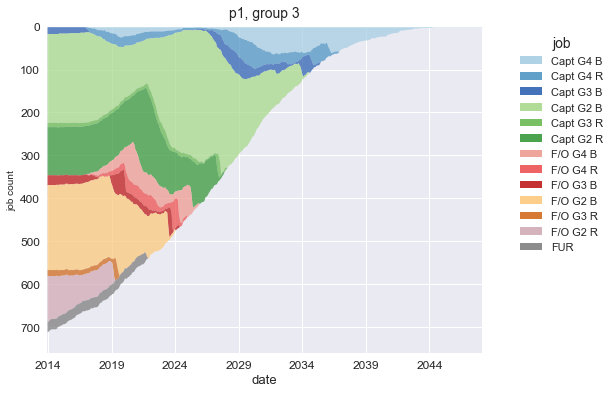

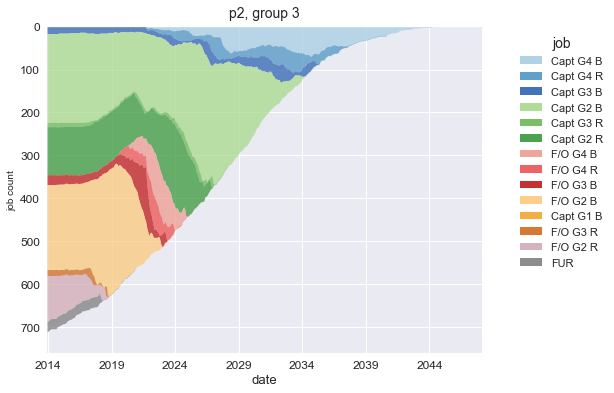

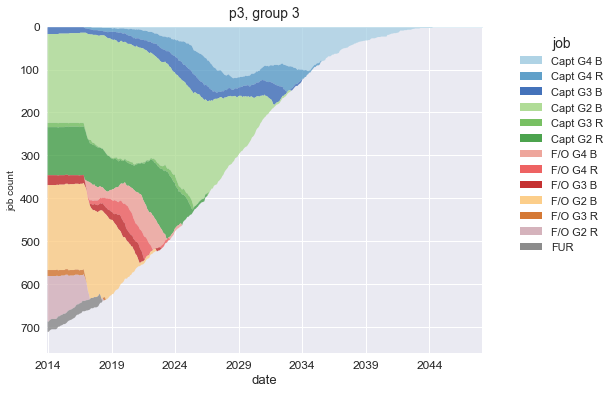

CPU times: user 6.23 s, sys: 52 ms, total: 6.28 s
Wall time: 6.28 s


In [49]:
%%time
mp.job_count_bands(['standalone', 'p1', 'p2', 'p3'], [1, 2, 3], job_colors,
                   sdict, ds_dict=ds_dict,
                   #attr1='ldate', oper1='<=', val1='1990-12-31',
                   chart_style='darkgrid')

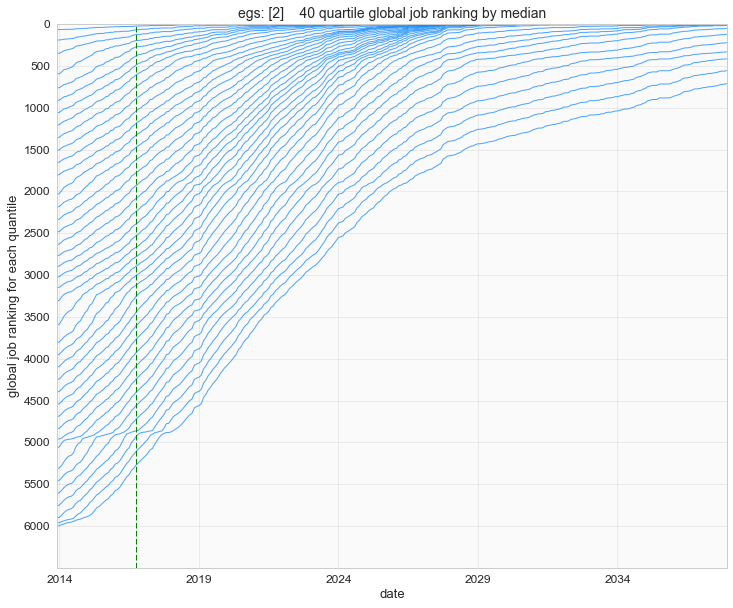

CPU times: user 796 ms, sys: 16 ms, total: 812 ms
Wall time: 810 ms


In [52]:
%%time
# cat_order progression for the median of each 2.5% segment (40 quartiles)
# of employee group 2 (standalone dataset)
mp.quartile_groupby('standalone', [2], 'cat_order', 40,
                    eg_colors, job_colors, sdict, adict,
                    ds_dict=ds_dict, show_job_bands=False,
                    custom_color=False,
                    through_date='2037-12-31')

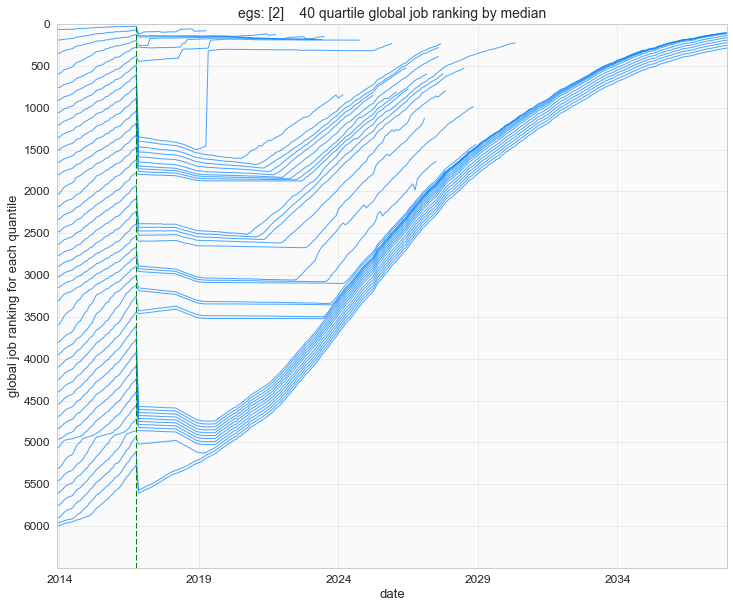

CPU times: user 712 ms, sys: 40 ms, total: 752 ms
Wall time: 748 ms


In [53]:
%%time
# same as above, but as affected by integration proposal p1,
# with a delayed implementation date
mp.quartile_groupby('p1', [2], 'cat_order', 40,
                    eg_colors, job_colors, sdict, adict,
                    ds_dict=ds_dict,
                    show_job_bands=False, custom_color=False,
                    through_date='2037-12-31')

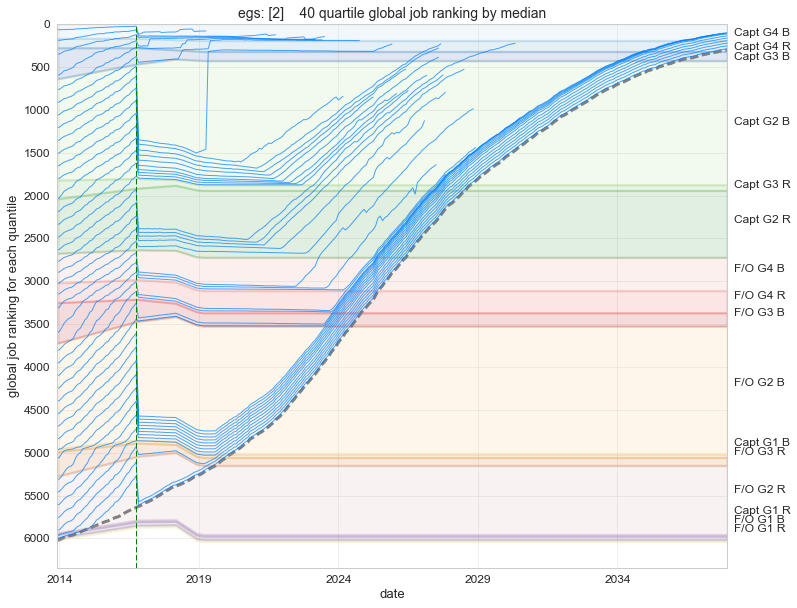

CPU times: user 1.12 s, sys: 52 ms, total: 1.17 s
Wall time: 1.17 s


In [54]:
%%time
# same as above, but with the addition of job bands
mp.quartile_groupby('p1', [2], 'cat_order', 40,
                    eg_colors, job_colors, sdict, adict,
                    ds_dict=ds_dict,
                    show_job_bands=True, custom_color=False,
                    through_date='2037-12-31')

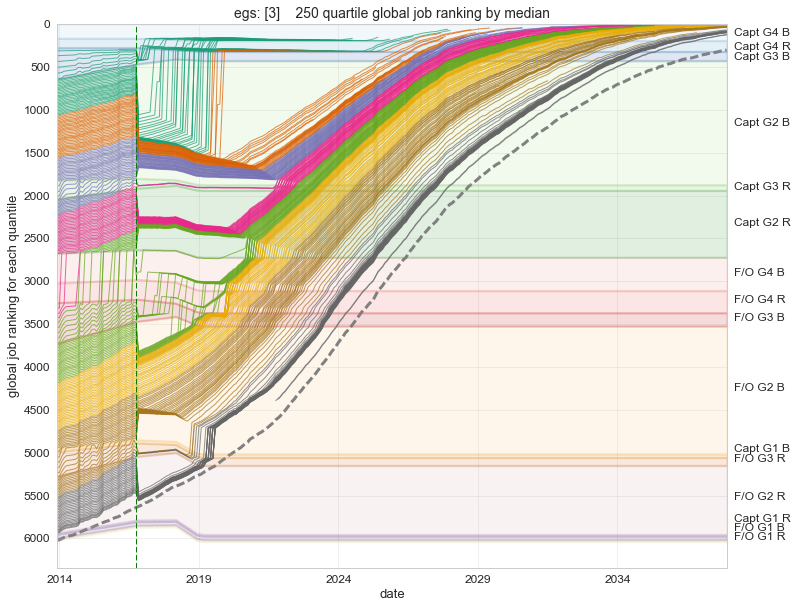

CPU times: user 2.4 s, sys: 48 ms, total: 2.45 s
Wall time: 2.44 s


In [55]:
%%time
# cat_order progression for the median of each .4% segment (250 quartiles)
# of employee group 2 (p1 dataset)
# custom color example 
mp.quartile_groupby('p1', [3], 'cat_order', 250,
                    eg_colors, job_colors, sdict, adict,
                    groupby_method='median',
                    ds_dict=ds_dict, show_job_bands=True,
                    line_width=1, custom_color=True, chart_style='whitegrid',
                    show_grid=True, cm_name='Dark2',
                    through_date='2037-12-31')

### custom plot example, eg job count over time, standalone vs. proposal

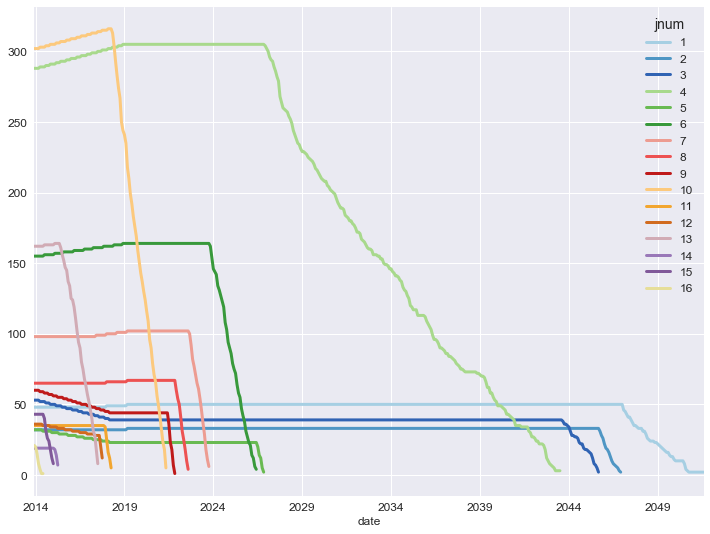

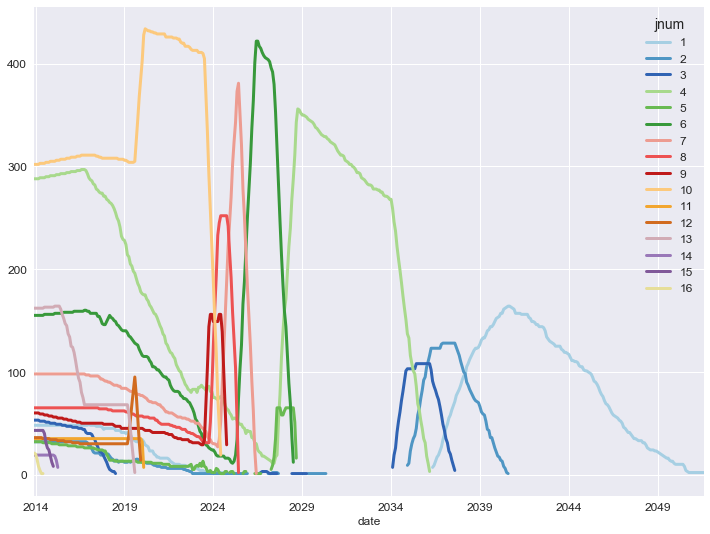

CPU times: user 940 ms, sys: 4 ms, total: 944 ms
Wall time: 941 ms


In [56]:
%%time
eg_num = 2

fur_color = '#404040'
j_colors = job_colors[:]
j_colors[-1] = fur_color

stand = ds_dict['standalone'][0]
p = ds_dict['p1'][0]

base_jobs = stand[stand.eg==eg_num].groupby(['date', 'jnum']).size().astype(int).unstack()
p_jobs = p[p.eg==eg_num].groupby(['date', 'jnum']).size().astype(int).unstack()

base_jobs_cols = list(base_jobs.columns)
p_jobs_cols = list(p_jobs.columns)

base_jobs.plot(color=list(j_colors[i - 1] for i in base_jobs_cols))
p_jobs.plot(color=list(j_colors[i - 1] for i in p_jobs_cols))

plt.show()

## custom color list creator demo

Note:  the following cells are included only as an example of creating a custom colormap for charts...

In [57]:
%%time
# get all available colormap names
sorted(m for m in plt.cm.datad if not m.endswith("_r"))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 62 µs


['Accent',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'Dark2',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'Paired',
 'Pastel1',
 'Pastel2',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Set1',
 'Set2',
 'Set3',
 'Spectral',
 'Vega10',
 'Vega20',
 'Vega20b',
 'Vega20c',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spectral',
 'spring',
 'summer',
 'terrain',
 'winter']

In [58]:
# use a colormap name(s) within the cm_name_list variable
# the make_color_list function can do several things, here it returns color lists...
mp.make_color_list(num_of_colors=10, cm_name_list=['Paired', 'cool'])

[[(0.65098039215686276, 0.80784313725490198, 0.8901960784313725, 1.0),
  (0.12156862745098039, 0.47058823529411764, 0.70588235294117652, 1.0),
  (0.69803921568627447, 0.87450980392156863, 0.54117647058823526, 1.0),
  (0.98431372549019602, 0.60392156862745094, 0.59999999999999998, 1.0),
  (0.8901960784313725, 0.10196078431372549, 0.10980392156862745, 1.0),
  (0.99215686274509807, 0.74901960784313726, 0.43529411764705883, 1.0),
  (0.792156862745098, 0.69803921568627447, 0.83921568627450982, 1.0),
  (0.41568627450980394, 0.23921568627450981, 0.60392156862745094, 1.0),
  (1.0, 1.0, 0.59999999999999998, 1.0),
  (0.69411764705882351, 0.34901960784313724, 0.15686274509803921, 1.0)],
 [(0.0, 1.0, 1.0, 1.0),
  (0.10980392156862745, 0.8901960784313725, 1.0, 1.0),
  (0.2196078431372549, 0.7803921568627451, 1.0, 1.0),
  (0.33333333333333331, 0.66666666666666674, 1.0, 1.0),
  (0.44313725490196076, 0.55686274509803924, 1.0, 1.0),
  (0.55686274509803924, 0.44313725490196076, 1.0, 1.0),
  (0.666666666


 palplot colormap: Paired  [  0.0  >>  1.0  ]


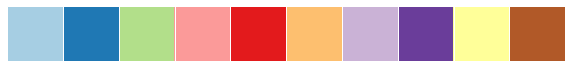


 palplot colormap: cool  [  0.0  >>  1.0  ]


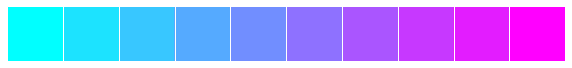

In [59]:
# same colormap inputs, this time with seaborn palplot output.
# the function produces lists of colors which may then be used for plotting.
mp.make_color_list(num_of_colors=10, cm_name_list=['Paired', 'cool'], return_list=False)

seaborn method of viewing a custom color list:

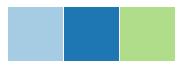

In [60]:
sns.palplot([(0.65, 0.80, 0.89, 1.0), (0.12, 0.47, 0.70, 1.0), (0.69, 0.87, 0.54, 1.0)])

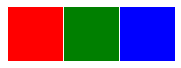

In [61]:
sns.palplot(['r', 'g', 'b'])